In [1]:
import pandas as pd  # Para manipulação de dados
import matplotlib.pyplot as plt  # Para plotagem de gráficos
import seaborn as sns  # Para plotagem de gráficos avançados
from sklearn.preprocessing import LabelEncoder
from itertools import cycle


# Importando as métricas e funções de avaliação do scikit-learn
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Importando os modelos de machine learning do scikit-learn
from sklearn.model_selection import train_test_split  # Para dividir os dados em treino e teste
from sklearn.linear_model import LogisticRegression  # Regressão Logística
from sklearn.neighbors import KNeighborsClassifier  # K-Vizinhos Mais Próximos
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV




In [2]:
# Define o número máximo de colunas e a largura máxima das colunas para None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# Carrega os dados de um arquivo CSV em um DataFrame.
var_dfPrincipal = pd.read_csv(r"C:\Users\Gustavo\Desktop\Facens\TCC\Datasets\INFLUD23-26-02-2024 - 274mil linhas.csv", delimiter=';')

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16868\1705905082.py:2: DtypeWarning: Columns (15,18,20,23,53,59,61,63,72,74,79,91,93,109,130,175,178) have mixed types. Specify dtype option on import or set low_memory=False.
  var_dfPrincipal = pd.read_csv(r"C:\Users\Gustavo\Desktop\Facens\TCC\Datasets\INFLUD23-26-02-2024 - 274mil linhas.csv", delimiter=';')


# Análise Exploratória

In [4]:
var_dfPrincipal.shape

(277304, 190)

In [5]:
#Exibe as 5 primeiras linhas
var_dfPrincipal.head()

DT_NOTIFIC  SEM_NOT  DT_SIN_PRI  SEM_PRI SG_UF_NOT           ID_REGIONA  \
0  08/02/2023        6  23/01/2023        4        RS              014 CRS   
1  27/02/2023        9  25/02/2023        8        PR   02RS METROPOLITANA   
2  17/03/2023       11  12/03/2023       11        SP     GVE XVI BOTUCATU   
3  21/03/2023       12  18/03/2023       11        PR        17RS LONDRINA   
4  29/03/2023       13  26/03/2023       13        SC  SAO MIGUEL DO OESTE   

   CO_REGIONA           ID_MUNICIP  CO_MUN_NOT  \
0      1602.0  CAMPINA DAS MISSOES      430370   
1      1356.0             CURITIBA      410690   
2      1341.0             BOTUCATU      350750   
3      1371.0             LONDRINA      411370   
4      1548.0           GUARACIABA      420640   

                                       ID_UNIDADE  CO_UNI_NOT CS_SEXO  \
0  POSTO DE SAUDE SEDE E PACS CAMPINA DAS MISSOES     2250225       M   
1     HOSPITAL UNIVERSITARIO EVANGELICO MACKENZIE       15245       M   
2                        HOSPITAL UNIMED BOTUCATU     7612990       F   
3          HOSPITAL DO CORACAO UNIDADE BELA SUICA     7758391       F   
4      ASSOCIACAO BENEFICIENTE HOSPITAL SAO LUCAS     2378116       M   

      DT_NASC  NU_IDADE_N  TP_IDADE COD_IDADE  CS_GESTANT  CS_RACA CS_ESCOL_N  \
0  01/07/1941          81         3      3081           6      1.0        1.0   
1  03/12/2022           2         2      2002           6      4.0        5.0   
2  05/05/1951          71         3      3071           5      1.0        3.0   
3  27/02/1931          92         3      3092           5      1.0        2.0   
4  10/12/2000          22         3      3022           6      1.0        3.0   

  ID_PAIS CO_PAIS SG_UF           ID_RG_RESI CO_RG_RESI           ID_MN_RESI  \
0  BRASIL       1    RS              014 CRS     1602.0  CAMPINA DAS MISSOES   
1  BRASIL       1    PR   02RS METROPOLITANA     1356.0             CURITIBA   
2  BRASIL       1    SP     GVE XVI BOTUCATU     1341.0             BOTUCATU   
3  BRASIL       1    PR        17RS LONDRINA     1371.0             LONDRINA   
4  BRASIL       1    SC  SAO MIGUEL DO OESTE     1548.0           GUARACIABA   

   CO_MUN_RES  CS_ZONA  SURTO_SG  NOSOCOMIAL  AVE_SUINO  FEBRE  TOSSE  \
0    430370.0      2.0       2.0         2.0        2.0    2.0    1.0   
1    410690.0      1.0       NaN         2.0        2.0    1.0    1.0   
2    350750.0      1.0       2.0         2.0        2.0    2.0    1.0   
3    411370.0      1.0       2.0         2.0        2.0    2.0    2.0   
4    420640.0      1.0       NaN         2.0        2.0    1.0    1.0   

   GARGANTA  DISPNEIA  DESC_RESP  SATURACAO  DIARREIA  VOMITO  OUTRO_SIN  \
0       2.0       1.0        1.0        2.0       2.0     2.0        NaN   
1       2.0       1.0        1.0        1.0       NaN     NaN        NaN   
2       2.0       1.0        1.0        1.0       2.0     2.0        2.0   
3       1.0       2.0        2.0        2.0       2.0     2.0        2.0   
4       NaN       NaN        NaN        NaN       1.0     1.0        NaN   

  OUTRO_DES  PUERPERA  FATOR_RISC  CARDIOPATI  HEMATOLOGI  SIND_DOWN  \
0       NaN       2.0         1.0         2.0         2.0        2.0   
1       NaN       NaN         2.0         NaN         NaN        NaN   
2       NaN       2.0         1.0         2.0         2.0        2.0   
3       NaN       NaN         2.0         NaN         NaN        NaN   
4       NaN       NaN         2.0         NaN         NaN        NaN   

   HEPATICA  ASMA  DIABETES  NEUROLOGIC  PNEUMOPATI  IMUNODEPRE  RENAL  \
0       2.0   2.0       2.0         2.0         1.0         1.0    2.0   
1       NaN   NaN       NaN         NaN         NaN         NaN    NaN   
2       2.0   2.0       1.0         2.0         2.0         2.0    2.0   
3       NaN   NaN       NaN         NaN         NaN         NaN    NaN   
4       NaN   NaN       NaN         NaN         NaN         NaN    NaN   

   OBESIDADE OBES_IMC  OUT_MORBI    MORB_DESC  VACIN

In [6]:
var_dfPrincipal.describe()

SEM_NOT        SEM_PRI     CO_REGIONA     CO_MUN_NOT  \
count  277304.000000  277304.000000  242285.000000  277304.000000   
mean       24.572206      24.080121    1561.002951  346403.036382   
std        13.843578      13.877651     654.252137   92254.466291   
min         1.000000       1.000000    1331.000000  110002.000000   
25%        13.000000      13.000000    1348.000000  310620.000000   
50%        23.000000      22.000000    1419.000000  352530.000000   
75%        36.000000      35.000000    1519.000000  410830.000000   
max        52.000000      52.000000    6256.000000  530010.000000   

         CO_UNI_NOT     NU_IDADE_N       TP_IDADE     CS_GESTANT  \
count  2.773040e+05  277304.000000  277304.000000  277304.000000   
mean   3.191444e+06      32.252925       2.750426       5.843215   
std    2.384920e+06      33.163194       0.459757       0.668316   
min    3.500000e+01      -5.000000       1.000000       0.000000   
25%    2.081490e+06       3.000000       3.000000       6.000000   
50%    2.493853e+06      10.000000       3.000000       6.000000   
75%    3.356868e+06      67.000000       3.000000       6.000000   
max    9.997091e+06     123.000000       3.000000       9.000000   

             CS_RACA     CO_MUN_RES        CS_ZONA       SURTO_SG  \
count  277303.000000  277235.000000  254564.000000  168770.000000   
mean        3.395989  346112.597821       1.195181       2.626782   
std         2.652596   92304.353536       0.975762       2.106036   
min         1.000000  110001.000000       1.000000       1.000000   
25%         1.000000  310620.000000       1.000000       2.000000   
50%         4.000000  352210.000000       1.000000       2.000000   
75%         4.000000  410940.000000       1.000000       2.000000   
max         9.000000  539934.000000       9.000000       9.000000   

          NOSOCOMIAL      AVE_SUINO          FEBRE          TOSSE  \
count  243810.000000  233215.000000  238007.000000  252221.000000   
mean        2.260162       3.066347       1.389972       1.212068   
std         1.413091       2.518332       0.810230       0.677870   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       2.000000       1.000000       1.000000   
50%         2.000000       2.000000       1.000000       1.000000   
75%         2.000000       2.000000       2.000000       1.000000   
max         9.000000       9.000000       9.000000       9.000000   

            GARGANTA       DISPNEIA      DESC_RESP      SATURACAO  \
count  199312.000000  240213.000000  232213.000000  226338.000000   
mean        2.062099       1.305862       1.318173       1.422306   
std         1.292232       0.787581       0.775932       0.888273   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       1.000000       1.000000       1.000000   
50%         2.000000       1.000000       1.000000       1.000000   
75%         2.000000       2.000000       2.000000       2.000000   
max         9.000000       9.000000       9.000000       9.000000   

            DIARREIA         VOMITO      OUTRO_SIN      PUERPERA  \
count  197620.000000  199871.000000  194889.000000  79376.000000   
mean        1.988255       1.937039       1.735054      2.074128   
std         0.882600       0.900403       1.143016      0.763447   
min         1.000000       1.000000       1.000000      1.000000   
25%         2.000000       2.000000       1.000000      2.000000   
50%         2.000000       2.000000       2.000000      2.000000   
75%         2.000000       2.000000       2.000000      2.000000   
max         9.000000       9.000000       9.000000      9.000000   

          FATOR_RISC    CARDIOPATI    HEMATOLOGI     SIND_DOWN      HEPATICA  \
count  277303.000000  94492.000000  80731.000000  80373.000000  80177.000000   
mean        1.551112      1.571699      2.058936      2.054832      2.069035   
std         0.497382      0.845127      0.825351      0.761

In [7]:
classes_obj = var_dfPrincipal['CLASSI_FIN']
classes_obj.describe()

count    266514.000000
mean          3.659425
std           1.122959
min           1.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: CLASSI_FIN, dtype: float64

In [8]:
print('Classes e quantidade:', Counter(var_dfPrincipal['CLASSI_FIN']))

Classes e quantidade: Counter({4.0: 151560, 5.0: 49647, 2.0: 48390, 1.0: 13359, 3.0: 3558, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 

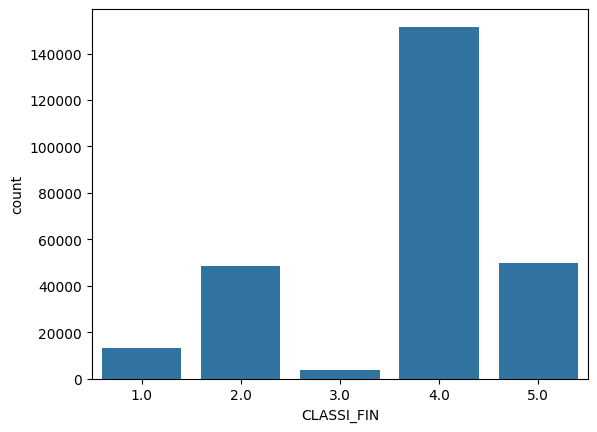

In [9]:
# Quantidade de itens de cada classe
sns.countplot(x="CLASSI_FIN", data=var_dfPrincipal)

plt.show()

Porcentagem do valores

In [10]:
# Suponha que 'var_dfPrincipal' seja o DataFrame e 'CLASSI_FIN' seja a coluna de interesse
total = len(var_dfPrincipal)  # Total de itens

# Contando a quantidade de itens em cada classe e calculando a porcentagem
ax = sns.countplot(x="CLASSI_FIN", data=var_dfPrincipal)

# Convertendo os valores de contagem para porcentagens
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Exibindo o gráfico
plt.show()

Quantidade de cada classe
- 4.0 -> 151560
- 5.0 -> 49647
- 2.0 -> 48390
- 1.0 -> 13359
- 3.0 -> 3558

In [11]:
# Calcula a porcentagem de valores nulos em cada coluna.
var_floatPorcentagemNulo = var_dfPrincipal.isnull().mean() * 100

# Seleciona as colunas com mais de 80% de valores nulos.
var_srColunasAltaPorcentagemNulo = var_floatPorcentagemNulo[var_floatPorcentagemNulo > 80]
print(var_srColunasAltaPorcentagemNulo)

# Cria um novo DataFrame com as colunas selecionadas e suas porcentagens de valores nulos.
var_dfColunasAltaPorcentagemNulo = pd.DataFrame(var_srColunasAltaPorcentagemNulo, columns=['Porcentagem de Nulos'])

# Exibe o novo DataFrame.
print(var_dfColunasAltaPorcentagemNulo)

OBES_IMC       99.766321
MORB_DESC      81.270014
DT_UT_DOSE     96.427026
MAE_VAC        93.987104
DT_VAC_MAE     99.789401
                 ...    
FAB_RE_BI      92.585394
DOSE_ADIC      98.195843
DOS_RE_BI      92.580345
LOTE_ADIC      98.218201
TABAG         100.000000
Length: 84, dtype: float64
            Porcentagem de Nulos
OBES_IMC               99.766321
MORB_DESC              81.270014
DT_UT_DOSE             96.427026
MAE_VAC                93.987104
DT_VAC_MAE             99.789401
...                          ...
FAB_RE_BI              92.585394
DOSE_ADIC              98.195843
DOS_RE_BI              92.580345
LOTE_ADIC              98.218201
TABAG                 100.000000

[84 rows x 1 columns]


In [12]:
# Colunas com mais de 80% dos dados nulos
var_dfColunasAltaPorcentagemNulo.sort_values(by='Porcentagem de Nulos')

Porcentagem de Nulos
MORB_DESC              81.270014
DOSE_2REF              82.651891
FAB_COVRF2             82.680380
LOTE_REF2              82.691919
DT_SAIDUTI             84.037014
...                          ...
DT_RT_VGM             100.000000
PAIS_VGM              100.000000
DT_TRT_COV            100.000000
VG_REINF              100.000000
TABAG                 100.000000

[84 rows x 1 columns]

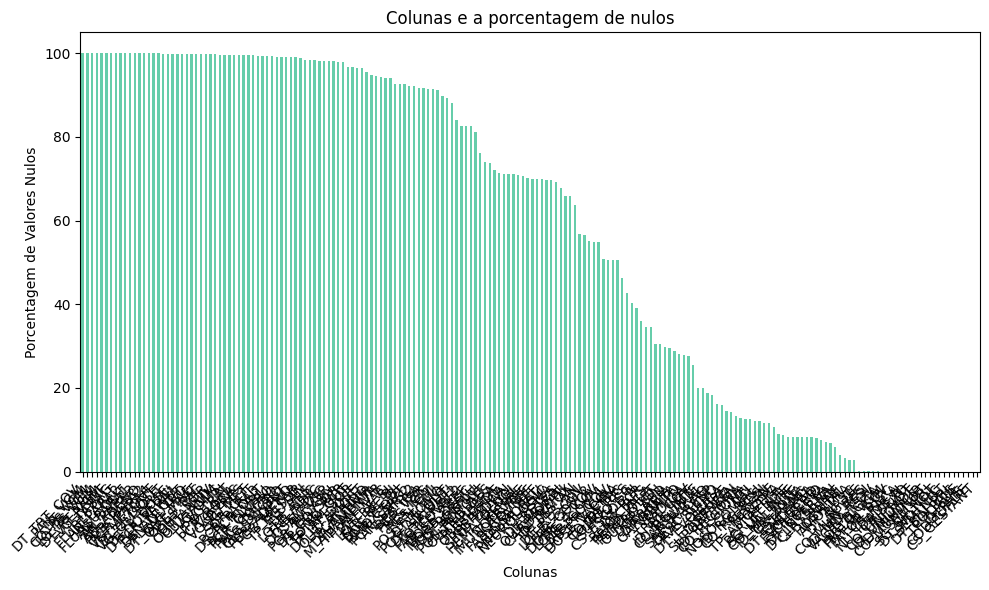

In [13]:
# Cria um gráfico de barras mostrando a quantidade de nulos que cada coluna tem
var_intNumeroNulos = (var_dfPrincipal.isnull().mean()* 100).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
var_intNumeroNulos.plot(kind='bar', color='mediumaquamarine')
plt.title('Colunas e a porcentagem de nulos')
plt.xlabel('Colunas')
plt.ylabel('Porcentagem de Valores Nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [14]:
# Mostrando os nulos da coluna target
var_dfPrincipal['CLASSI_FIN'].isna().mean()

np.float64(0.03891036551942994)

In [15]:
# Quantidade de linhas duplicadas
var_dfPrincipal.duplicated().sum()

np.int64(196)

# Cleaning

removendo as colunas que tem mais de 80% dos dados nulos

In [16]:
# Cria uma cópia do DataFrame principal para evitar modificar o original.
var_dfCopia = var_dfPrincipal.copy()

# Calcula a porcentagem de valores nulos em cada coluna no DataFrame copiado.
var_srColunasAltaPorcentagemNulo = var_dfCopia.isnull().mean() * 100

# Seleciona as colunas com mais de 80% de valores nulos.
columns_to_drop = var_srColunasAltaPorcentagemNulo[var_srColunasAltaPorcentagemNulo > 80].index.tolist()
# print(columns_to_drop)  # Descomente esta linha para verificar as colunas que serão removidas.

# Remove as colunas selecionadas do DataFrame copiado.
var_dfCopia.drop(columns=columns_to_drop, inplace=True)

# Exibe um resumo das informações do DataFrame copiado após a remoção das colunas,
# incluindo o tipo de dados e o número de valores não nulos em cada coluna.
var_dfCopia.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277304 entries, 0 to 277303
Columns: 106 entries, DT_NOTIFIC to REINF
dtypes: float64(55), int64(7), object(44)
memory usage: 224.3+ MB


In [17]:
# Retirando os nulos da coluna de classificação final
var_dfFiltrada = var_dfCopia.dropna(subset=['CLASSI_FIN']).copy()

In [18]:
# Verificando a quantidade de nulos das colunas, ordenando do maior para o menor
var_dfFiltrada.isna().sum().sort_values(ascending=False)

POS_PCRFLU    200872
DT_ENTUTI     196842
POS_PCROUT    193916
OUTRO_DES     190998
PUERPERA      189156
               ...  
DT_SIN_PRI         0
DT_DIGITA          0
CLASSI_FIN         0
HISTO_VGM          0
FNT_IN_COV         0
Length: 106, dtype: int64

Removendo as linhas inteiramente nulas

In [19]:
# Remove as linhas que têm todos os valores nulos do DataFrame filtrado.
var_dfFiltrada.dropna(how='all', inplace=True)

# Calcula o número de valores nulos em cada coluna do DataFrame filtrado e ordena em ordem decrescente.
var_srQuantidadeNulos = var_dfFiltrada.isna().sum().sort_values(ascending=False)

# Exibe a série com a contagem de valores nulos em cada coluna, ordenada de forma decrescente.
print(var_srQuantidadeNulos)


POS_PCRFLU    200872
DT_ENTUTI     196842
POS_PCROUT    193916
OUTRO_DES     190998
PUERPERA      189156
               ...  
DT_SIN_PRI         0
DT_DIGITA          0
CLASSI_FIN         0
HISTO_VGM          0
FNT_IN_COV         0
Length: 106, dtype: int64


In [20]:
# Exibe um resumo das informações do DataFrame filtrado.
# O parâmetro 'max_cols' é definido para mostrar até 107 colunas no resumo.
var_dfFiltrada.info(max_cols=107)

<class 'pandas.core.frame.DataFrame'>
Index: 266514 entries, 0 to 277303
Data columns (total 106 columns):
 #    Column      Non-Null Count   Dtype  
---   ------      --------------   -----  
 0    DT_NOTIFIC  266514 non-null  object 
 1    SEM_NOT     266514 non-null  int64  
 2    DT_SIN_PRI  266514 non-null  object 
 3    SEM_PRI     266514 non-null  int64  
 4    SG_UF_NOT   266514 non-null  object 
 5    ID_REGIONA  232597 non-null  object 
 6    CO_REGIONA  232597 non-null  float64
 7    ID_MUNICIP  266514 non-null  object 
 8    CO_MUN_NOT  266514 non-null  int64  
 9    ID_UNIDADE  266514 non-null  object 
 10   CO_UNI_NOT  266514 non-null  int64  
 11   CS_SEXO     266514 non-null  object 
 12   DT_NASC     266433 non-null  object 
 13   NU_IDADE_N  266514 non-null  int64  
 14   TP_IDADE    266514 non-null  int64  
 15   COD_IDADE   266514 non-null  object 
 16   CS_GESTANT  266514 non-null  int64  
 17   CS_RACA     266514 non-null  float64
 18   CS_ESCOL_N  172044 non-null

Removendo as linhas duplicadas

In [21]:
var_dfFiltrada.drop_duplicates(inplace=True)

### Tratando as colunas

Ajustando os valores de colunas que tem dados nulos para o valor de 9.0 que é ignorado

In [22]:
# Lista de colunas a serem tratadas no DataFrame.
var_listColunasTratar = [
      'PUERPERA', 'SURTO_SG', 'GARGANTA', 'DIARREIA', 'VOMITO',
      'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA',
      'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL',
      'OBESIDADE', 'OUT_MORBI', 'VACINA', 'ANTIVIRAL',
      'POS_PCRFLU', 'POS_PCROUT', 'DOR_ABD', 'FADIGA', 'PERD_OLFT',
      'PERD_PALA', 'TRAT_COV', 'CO_DETEC', 'CS_ESCOL_N', 'ESTRANG',
      'RES_AN', 'TP_TES_AN', 'TOMO_RES'
]

# Itera sobre cada coluna na lista de colunas a serem tratadas.
for coluna in var_listColunasTratar:
    try:
        # Calcula a frequência de cada valor na coluna.
        var_intFrequencia = var_dfFiltrada[coluna].value_counts()

        # Conta o número total de registros não nulos na coluna.
        var_intTotalRegistro = var_dfFiltrada[coluna].count()

        # Calcula a porcentagem de cada valor em relação ao total de registros.
        var_intPorcetagens = (var_intFrequencia / var_intTotalRegistro) * 100

        # Exibe as porcentagens calculadas para a coluna.
        print(f'\n\nPorcentagens -- {coluna}  - \n{var_intPorcetagens}:\n')

        # Substitui os valores 6.0 por 9 na coluna.
        var_dfFiltrada[coluna].replace(6.0, 9, inplace=True)

        # Preenche os valores vazios (NaN) com 9 na coluna.
        var_dfFiltrada[coluna].fillna(value=9, inplace=True)

        # Exibe as estatísticas descritivas da coluna após o tratamento.
        print('\n\n', var_dfFiltrada[coluna].describe())

    except Exception as e:
        # Exibe uma mensagem de erro se houver uma exceção ao processar a coluna.
        print(f'Coluna que deu erro: {coluna} - {e}')




Porcentagens -- PUERPERA  - 
PUERPERA
2.0    97.988825
9.0     1.157557
1.0     0.853618
Name: count, dtype: float64:



 count    266324.000000
mean          6.988837
std           3.170683
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: PUERPERA, dtype: float64


Porcentagens -- SURTO_SG  - 
SURTO_SG
2.0    84.791420
9.0     9.715088
1.0     5.493492
Name: count, dtype: float64:



 count    266324.000000
mean          4.978252
std           3.500726
min           1.000000
25%           2.000000
50%           2.000000
75%           9.000000
max           9.000000
Name: SURTO_SG, dtype: float64


Porcentagens -- GARGANTA  - 
GARGANTA
2.0    81.679393
1.0    15.318993
9.0     3.001614
Name: count, dtype: float64:



 count    266324.000000
mean          3.960766
std           3.281809
min           1.000000
25%           2.000000
50%           2.000000
75%           9.000000
max           9.000000
Name: GARGANTA

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16868\3251313976.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_dfFiltrada[coluna].replace(6.0, 9, inplace=True)
C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16868\3251313976.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy



 count    266324.000000
mean          6.437460
std           3.565143
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: CARDIOPATI, dtype: float64


Porcentagens -- HEMATOLOGI  - 
HEMATOLOGI
2.0    95.275220
1.0     3.407183
9.0     1.317597
Name: count, dtype: float64:



 count    266324.000000
mean          6.950530
std           3.197886
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: HEMATOLOGI, dtype: float64


Porcentagens -- SIND_DOWN  - 
SIND_DOWN
2.0    96.358085
1.0     2.506291
9.0     1.135623
Name: count, dtype: float64:



 count    266324.000000
mean          6.958427
std           3.190919
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: SIND_DOWN, dtype: float64


Porcentagens -- HEPATICA  - 
HEPATICA
2.0    96.381145
1.0     2.310125
9.0     1.308730
Na

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16868\3251313976.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_dfFiltrada[coluna].replace(6.0, 9, inplace=True)
C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16868\3251313976.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy



 count    266324.000000
mean          6.828465
std           3.301268
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: PNEUMOPATI, dtype: float64


Porcentagens -- IMUNODEPRE  - 
IMUNODEPRE
2.0    88.622338
1.0    10.117340
9.0     1.260322
Name: count, dtype: float64:



 count    266324.000000
mean          6.879320
std           3.254577
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: IMUNODEPRE, dtype: float64


Porcentagens -- RENAL  - 
RENAL
2.0    90.089761
1.0     8.719298
9.0     1.190941
Name: count, dtype: float64:



 count    266324.000000
mean          6.911059
std           3.235274
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: RENAL, dtype: float64


Porcentagens -- OBESIDADE  - 
OBESIDADE
2.0    90.639700
1.0     7.627434
9.0     1.732867
Name: count,

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16868\3251313976.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_dfFiltrada[coluna].replace(6.0, 9, inplace=True)
C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16868\3251313976.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy



 count    266324.000000
mean          6.976082
std           3.257566
min           1.000000
25%           2.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: VACINA, dtype: float64


Porcentagens -- ANTIVIRAL  - 
ANTIVIRAL
2.0    80.636743
9.0    11.621434
1.0     7.741823
Name: count, dtype: float64:



 count    266324.000000
mean          3.862686
std           3.174460
min           1.000000
25%           2.000000
50%           2.000000
75%           9.000000
max           9.000000
Name: ANTIVIRAL, dtype: float64


Porcentagens -- POS_PCRFLU  - 
POS_PCRFLU
2.0    85.027064
1.0    13.548830
9.0     1.424106
Name: count, dtype: float64:



 count    266324.000000
mean          7.267362
std           3.064864
min           1.000000
25%           9.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: POS_PCRFLU, dtype: float64


Porcentagens -- POS_PCROUT  - 
POS_PCROUT
1.0    91.344152
2.0     8.592425
9.0     0.063423
Na

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16868\3251313976.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_dfFiltrada[coluna].fillna(value=9, inplace=True)
C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16868\3251313976.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy



Porcentagens -- PERD_PALA  - 
PERD_PALA
2.0    94.087933
9.0     4.303087
1.0     1.608980
Name: count, dtype: float64:



 count    266324.000000
mean          4.283245
std           3.295446
min           1.000000
25%           2.000000
50%           2.000000
75%           9.000000
max           9.000000
Name: PERD_PALA, dtype: float64


Porcentagens -- TRAT_COV  - 
TRAT_COV
2.0    83.726102
9.0    14.942051
1.0     1.331847
Name: count, dtype: float64:



 count    266324.000000
mean          4.476138
std           3.358947
min           1.000000
25%           2.000000
50%           2.000000
75%           9.000000
max           9.000000
Name: TRAT_COV, dtype: float64


Porcentagens -- CO_DETEC  - 
CO_DETEC
2.0    86.571016
9.0    11.335054
1.0     2.093930
Name: count, dtype: float64:



 count    266324.000000
mean          5.303690
std           3.508694
min           1.000000
25%           2.000000
50%           2.000000
75%           9.000000
max           9.000000
Name: CO_DE

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16868\3251313976.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_dfFiltrada[coluna].replace(6.0, 9, inplace=True)
C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16868\3251313976.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy



 count     266324
unique         5
top            9
freq      149162
Name: TP_TES_AN, dtype: int64


Porcentagens -- TOMO_RES  - 
TOMO_RES
6.0    71.732739
9.0     8.548804
5.0     6.695739
1.0     5.564135
2.0     3.869198
3.0     2.961197
4.0     0.628189
Name: count, dtype: float64:



 count    266324.000000
mean          8.274864
std           2.045999
min           1.000000
25%           9.000000
50%           9.000000
75%           9.000000
max           9.000000
Name: TOMO_RES, dtype: float64


C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16868\3251313976.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_dfFiltrada[coluna].replace(6.0, 9, inplace=True)
C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16868\3251313976.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

## Data Wrangling

Criando a coluna coriza a partir da coluna Outro_sin

In [23]:
# Adiciona uma nova coluna 'Coriza' ao DataFrame filtrado com valor padrão 0.
var_dfFiltrada['Coriza'] = 0

# Preenche os valores nulos na coluna 'OUTRO_DES' com a string 'sem sintomas'.
var_dfFiltrada['OUTRO_DES'].fillna(value='sem sintomas', inplace=True)

# Verifica se a string 'coriza' (independente de maiúsculas/minúsculas) está presente na coluna 'OUTRO_DES'.
# Se a string 'coriza' estiver presente, atualiza o valor na coluna 'Coriza' para 1.
var_dfFiltrada.loc[var_dfFiltrada['OUTRO_DES'].str.contains('CORIZA', case=False), 'Coriza'] = 1


C:\Users\Gustavo\AppData\Local\Temp\ipykernel_16868\1955746177.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_dfFiltrada['OUTRO_DES'].fillna(value='sem sintomas', inplace=True)


In [24]:
# Criado uma coluna somente para a Coriza que é um sintoma importante no caso de gripes
var_dfFiltrada[['Coriza', 'OUTRO_DES']].head(30)


Coriza                  OUTRO_DES
0        0               sem sintomas
1        0               sem sintomas
2        0               sem sintomas
3        0               sem sintomas
4        0               sem sintomas
5        0               sem sintomas
6        0                CHEGA EM VM
7        0               sem sintomas
8        0               sem sintomas
9        0               sem sintomas
10       0               sem sintomas
11       0               sem sintomas
12       0               sem sintomas
13       1     CORIZA CONGESTAO NASAL
15       0               sem sintomas
16       1                     CORIZA
17       0               sem sintomas
18       0               DOR TORACICA
19       0               sem sintomas
20       0               sem sintomas
21       0               sem sintomas
22       0               sem sintomas
23       0               sem sintomas
24       0               sem sintomas
25       0               sem sintomas
26       0               sem sintomas
27       0                 HIPOTENSAO
28       0               sem sintomas
29       1                     CORIZA
30       0  INAPETENCIA, TSC, CIANOSE

In [25]:
# Quantidade de vezes que o sintoma coriza apareceu.
var_dfFiltrada['Coriza'].sum()

np.int64(26832)

## Continuação Cleaning

Removendo as colunas de outros sintomas, por não sabermos que outros sintomas são esses

In [26]:
# Lista de colunas a serem analisadas para formatos diferentes e dados como datas.
var_listColunasAnalise = [
    'RAIOX_RES', 'DT_RAIOX', 'DT_PCR', 'DT_EVOLUCA', 'DOSE_1_COV', 'DOSE_2_COV', 'DOSE_REF', 'FAB_COV_1',
    'FAB_COV_2', 'FAB_COVREF', 'LAB_PR_COV', 'LOTE_1_COV', 'LOTE_2_COV', 'LOTE_REF'
]

# Itera sobre cada coluna na lista de colunas a serem analisadas.
for coluna in var_listColunasAnalise:
    try:
        # Calcula a frequência de cada valor na coluna.
        var_srFrequencia = var_dfFiltrada[coluna].value_counts()

        # Conta o número total de registros não nulos na coluna.
        var_intTotalRegistros = var_dfFiltrada[coluna].count()

        # Calcula a porcentagem de cada valor em relação ao total de registros.
        var_srPorcentagens = (var_srFrequencia / var_intTotalRegistros) * 100

        # Exibe as porcentagens calculadas para a coluna.
        print(f'\n\nPorcentagens -- {coluna}  - \n{var_srPorcentagens}:\n')

    except Exception as e:
        # Exibe uma mensagem de erro se houver uma exceção ao processar a coluna.
        print(f'Coluna que deu erro: {coluna} - {e}')




Porcentagens -- RAIOX_RES  - 
RAIOX_RES
6.0    29.532025
2.0    23.474290
5.0    13.973839
1.0    11.622124
9.0    10.862652
3.0     5.835025
4.0     3.183920
6       0.435837
2       0.368742
5       0.214253
1       0.175350
9       0.168020
3       0.100361
4       0.053563
Name: count, dtype: float64:



Porcentagens -- DT_RAIOX  - 
DT_RAIOX
23/05/2023    0.502186
22/05/2023    0.494053
24/05/2023    0.493036
24/04/2023    0.491003
29/05/2023    0.477788
                ...   
29/08/2024    0.001017
12/12/2202    0.001017
15/02/2202    0.001017
29/03/2032    0.001017
23/12/2202    0.001017
Name: count, Length: 437, dtype: float64:



Porcentagens -- DT_PCR  - 
DT_PCR
07/06/2023    0.642639
30/05/2023    0.629366
18/05/2023    0.619964
25/05/2023    0.587334
02/06/2023    0.566318
                ...   
18/02/2024    0.000553
05/02/2024    0.000553
07/02/2024    0.000553
28/01/2024    0.000553
09/02/2024    0.000553
Name: count, Length: 404, dtype: float64:



Porcentagens -- DT_E

In [27]:
# criando uma copia do dataframe
var_dfFinal = var_dfFiltrada.copy()

In [28]:
# Lista de colunas a serem removidas do DataFrame, pois não são relevantes para a análise.
var_listColunasRemover = ['RAIOX_RES', 'DT_RAIOX', 'DT_PCR', 'DT_EVOLUCA', 'DT_RES_AN', 'DOSE_1_COV', 'DOSE_2_COV', 'DOSE_REF',
 'FAB_COVREF', 'DT_ENTUTI', 'FAB_COV_1', 'FAB_COV_2', 'LAB_PR_COV', 'LOTE_1_COV', 'LOTE_2_COV', 'LOTE_REF',
 'CO_RG_INTE', 'OUTRO_DES', 'OUTRO_SIN', 'ID_RG_INTE', 'CO_MU_INTE', 'DT_NOTIFIC', 'DT_SIN_PRI', 'DT_NASC',
 'DT_INTERNA', 'DT_COLETA', 'DT_ENCERRA', 'DT_DIGITA', 'ID_MN_INTE','ID_MN_RESI','ID_RG_RESI','SG_UF',
 'ID_PAIS','ID_UNIDADE','ID_MUNICIP','ID_REGIONA','SG_UF_NOT',
 'CO_MUN_NOT', 'CO_UNI_NOT', 'SEM_NOT', 'SEM_PRI', 'CO_REGIONA', 'TP_IDADE', 'COD_IDADE', 'CS_GESTANT',
 'CO_RG_RESI', 'CO_MUN_RES', 'SG_UF_INTE', 'SUPORT_VEN']

# Remove as colunas listadas do DataFrame final.
var_dfFinal.drop(columns=var_listColunasRemover, axis=1, inplace=True)


In [29]:
var_dfFinal.head()

CS_SEXO  NU_IDADE_N  CS_RACA CS_ESCOL_N CO_PAIS  CS_ZONA  SURTO_SG  \
0       M          81      1.0        1.0       1      2.0       2.0   
1       M           2      4.0        5.0       1      1.0       9.0   
2       F          71      1.0        3.0       1      1.0       2.0   
3       F          92      1.0        2.0       1      1.0       2.0   
4       M          22      1.0        3.0       1      1.0       9.0   

   NOSOCOMIAL  AVE_SUINO  FEBRE  TOSSE  GARGANTA  DISPNEIA  DESC_RESP  \
0         2.0        2.0    2.0    1.0       2.0       1.0        1.0   
1         2.0        2.0    1.0    1.0       2.0       1.0        1.0   
2         2.0        2.0    2.0    1.0       2.0       1.0        1.0   
3         2.0        2.0    2.0    2.0       1.0       2.0        2.0   
4         2.0        2.0    1.0    1.0       9.0       NaN        NaN   

   SATURACAO  DIARREIA  VOMITO  PUERPERA  FATOR_RISC  CARDIOPATI  HEMATOLOGI  \
0        2.0       2.0     2.0       2.0         1.0         2.0         2.0   
1        1.0       9.0     9.0       9.0         2.0         9.0         9.0   
2        1.0       2.0     2.0       2.0         1.0         2.0         2.0   
3        2.0       2.0     2.0       9.0         2.0         9.0         9.0   
4        NaN       1.0     1.0       9.0         2.0         9.0         9.0   

   SIND_DOWN  HEPATICA  ASMA  DIABETES  NEUROLOGIC  PNEUMOPATI  IMUNODEPRE  \
0        2.0       2.0   2.0       2.0         2.0         1.0         1.0   
1        9.0       9.0   9.0       9.0         9.0         9.0         9.0   
2        2.0       2.0   2.0       1.0         2.0         2.0         2.0   
3        9.0       9.0   9.0       9.0         9.0         9.0         9.0   
4        9.0       9.0   9.0       9.0         9.0         9.0         9.0   

   RENAL  OBESIDADE  OUT_MORBI  VACINA  ANTIVIRAL  HOSPITAL  UTI  AMOSTRA  \
0    2.0        2.0        1.0     9.0        9.0       1.0  2.0      1.0   
1    9.0        9.0        9.0     9.0        2.0       1.0  2.0      1.0   
2    2.0        2.0        1.0     9.0        2.0       1.0  2.0      1.0   
3    9.0        9.0        9.0     2.0        2.0       1.0  2.0      1.0   
4    9.0        9.0        9.0     2.0        2.0       1.0  2.0      1.0   

   TP_AMOSTRA  PCR_RESUL  POS_PCRFLU  POS_PCROUT  CLASSI_FIN  CRITERIO  \
0         1.0        1.0         2.0         1.0         5.0       1.0   
1         1.0        1.0         2.0         1.0         2.0       1.0   
2         1.0        2.0         9.0         9.0         4.0       1.0   
3         1.0        4.0         9.0         9.0         5.0       1.0   
4         1.0        2.0         9.0         9.0         4.0       1.0   

  EVOLUCAO  HISTO_VGM  DOR_ABD  FADIGA  PERD_OLFT  PERD_PALA  TOMO_RES  \
0      3.0        0.0      1.0     2.0        2.0        2.0       9.0   
1      1.0        0.0      9.0     9.0        9.0        9.0       9.0   
2      1.0        0.0      2.0     2.0        2.0        2.0       2.0   
3      1.0        0.0      2.0     2.0        2.0        2.0       3.0   
4      NaN        0.0      1.0     9.0        9.0        9.0       9.0   

  TP_TES_AN  RES_AN  ESTRANG  VACINA_COV  FNT_IN_COV  TRAT_COV  CO_DETEC  \
0         9     9.0      9.0         1.0         2.0       9.0       2.0   
1         9     4.0      2.0         2.0         2.0       2.0       9.0   
2         9     5.0      2.0         1.0         2.0       9.0       2.0   
3       2.0     1.0      2.0         1.0         2.0       2.0       2.0   
4         9     9.0      2.0         1.0         1.0       2.0       9.0   

   REINF  Coriza  
0    2.0       0  
1    2.0       0  
2    2.0       0  
3    2.0       0  
4    2.0       0

In [30]:
var_dfFinal.info(max_cols=100)

<class 'pandas.core.frame.DataFrame'>
Index: 266324 entries, 0 to 277303
Data columns (total 58 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CS_SEXO     266324 non-null  object 
 1   NU_IDADE_N  266324 non-null  int64  
 2   CS_RACA     266324 non-null  float64
 3   CS_ESCOL_N  266324 non-null  object 
 4   CO_PAIS     266324 non-null  object 
 5   CS_ZONA     245216 non-null  float64
 6   SURTO_SG    266324 non-null  float64
 7   NOSOCOMIAL  236996 non-null  float64
 8   AVE_SUINO   226749 non-null  float64
 9   FEBRE       229788 non-null  float64
 10  TOSSE       243226 non-null  float64
 11  GARGANTA    266324 non-null  float64
 12  DISPNEIA    231890 non-null  float64
 13  DESC_RESP   225020 non-null  float64
 14  SATURACAO   219572 non-null  float64
 15  DIARREIA    266324 non-null  float64
 16  VOMITO      266324 non-null  float64
 17  PUERPERA    266324 non-null  float64
 18  FATOR_RISC  266324 non-null  float64
 19  CARDIOP

In [31]:
# Removendo agora todas os nulos
var_dfFinal.dropna(inplace=True)

Ajustando o tipo de valor das colunas

In [32]:
# Lista de colunas a serem convertidas para o tipo float.
var_listColunasFloat = ['CS_ESCOL_N', 'TP_TES_AN','CO_PAIS', 'EVOLUCAO']

# Converte as colunas listadas para o tipo float.
var_dfFinal[var_listColunasFloat] = var_dfFinal[var_listColunasFloat].astype('float')


In [33]:
# Lista de colunas a serem convertidas para o tipo inteiro.
var_listColunasInt = [
    'PUERPERA', 'GARGANTA', 'DIARREIA', 'VOMITO', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN',
    'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE',
    'OUT_MORBI', 'VACINA', 'ANTIVIRAL', 'POS_PCROUT', 'DOR_ABD', 'FADIGA', 'CS_ESCOL_N',
    'PERD_OLFT', 'PERD_PALA', 'ESTRANG', 'RES_AN', 'TP_TES_AN', 'TOMO_RES',
     'CS_RACA', 'CS_ZONA', 'NOSOCOMIAL', 'AVE_SUINO', 'FEBRE', 'TOSSE',
    'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'FATOR_RISC', 'HOSPITAL', 'UTI', 'AMOSTRA',
    'TP_AMOSTRA', 'PCR_RESUL', 'CLASSI_FIN', 'CRITERIO', 'HISTO_VGM', 'VACINA_COV', 'FNT_IN_COV',
    'CO_PAIS', 'EVOLUCAO'
]

# Converte as colunas listadas para o tipo Int32.
for var_strColuna in var_listColunasInt:
    var_dfFinal[var_strColuna] = var_dfFinal[var_strColuna].astype('Int32')


In [34]:
var_dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136895 entries, 0 to 277295
Data columns (total 58 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CS_SEXO     136895 non-null  object 
 1   NU_IDADE_N  136895 non-null  int64  
 2   CS_RACA     136895 non-null  Int32  
 3   CS_ESCOL_N  136895 non-null  Int32  
 4   CO_PAIS     136895 non-null  Int32  
 5   CS_ZONA     136895 non-null  Int32  
 6   SURTO_SG    136895 non-null  float64
 7   NOSOCOMIAL  136895 non-null  Int32  
 8   AVE_SUINO   136895 non-null  Int32  
 9   FEBRE       136895 non-null  Int32  
 10  TOSSE       136895 non-null  Int32  
 11  GARGANTA    136895 non-null  Int32  
 12  DISPNEIA    136895 non-null  Int32  
 13  DESC_RESP   136895 non-null  Int32  
 14  SATURACAO   136895 non-null  Int32  
 15  DIARREIA    136895 non-null  Int32  
 16  VOMITO      136895 non-null  Int32  
 17  PUERPERA    136895 non-null  Int32  
 18  FATOR_RISC  136895 non-null  Int32  
 19  CARDIOP

In [35]:
# Plotando Object
var_dfObject= var_dfFinal.select_dtypes(include=[object])
var_dfObject.head(20)

CS_SEXO
0        M
1        M
2        F
3        F
9        M
11       M
12       M
13       M
15       M
19       F
20       F
21       F
22       F
28       F
29       M
30       M
31       M
32       F
35       F
38       M

In [36]:
var_dfFinal.head()

CS_SEXO  NU_IDADE_N  CS_RACA  CS_ESCOL_N  CO_PAIS  CS_ZONA  SURTO_SG  \
0       M          81        1           1        1        2       2.0   
1       M           2        4           5        1        1       9.0   
2       F          71        1           3        1        1       2.0   
3       F          92        1           2        1        1       2.0   
9       M           2        4           5        1        1       2.0   

   NOSOCOMIAL  AVE_SUINO  FEBRE  TOSSE  GARGANTA  DISPNEIA  DESC_RESP  \
0           2          2      2      1         2         1          1   
1           2          2      1      1         2         1          1   
2           2          2      2      1         2         1          1   
3           2          2      2      2         1         2          2   
9           2          2      1      2         2         1          1   

   SATURACAO  DIARREIA  VOMITO  PUERPERA  FATOR_RISC  CARDIOPATI  HEMATOLOGI  \
0          2         2       2         2           1           2           2   
1          1         9       9         9           2           9           9   
2          1         2       2         2           1           2           2   
3          2         2       2         9           2           9           9   
9          2         2       2         9           2           9           9   

   SIND_DOWN  HEPATICA  ASMA  DIABETES  NEUROLOGIC  PNEUMOPATI  IMUNODEPRE  \
0          2         2     2         2           2           1           1   
1          9         9     9         9           9           9           9   
2          2         2     2         1           2           2           2   
3          9         9     9         9           9           9           9   
9          9         9     9         9           9           9           9   

   RENAL  OBESIDADE  OUT_MORBI  VACINA  ANTIVIRAL  HOSPITAL  UTI  AMOSTRA  \
0      2          2          1       9          9         1    2        1   
1      9          9          9       9          2         1    2        1   
2      2          2          1       9          2         1    2        1   
3      9          9          9       2          2         1    2        1   
9      9          9          9       9          1         1    2        1   

   TP_AMOSTRA  PCR_RESUL  POS_PCRFLU  POS_PCROUT  CLASSI_FIN  CRITERIO  \
0           1          1         2.0           1           5         1   
1           1          1         2.0           1           2         1   
2           1          2         9.0           9           4         1   
3           1          4         9.0           9           5         1   
9           1          2         9.0           9           4         1   

   EVOLUCAO  HISTO_VGM  DOR_ABD  FADIGA  PERD_OLFT  PERD_PALA  TOMO_RES  \
0         3          0        1       2          2          2         9   
1         1          0        9       9          9          9         9   
2         1          0        2       2          2          2         2   
3         1          0        2       2          2          2         3   
9         1          0        2       2          2          2         9   

   TP_TES_AN  RES_AN  ESTRANG  VACINA_COV  FNT_IN_COV  TRAT_COV  CO_DETEC  \
0          9       9        9           1           2       9.0       2.0   
1          9       4        2           2           2       2.0       9.0   
2          9       5        2           1           2       9.0       2.0   
3          2       1        2           1           2       2.0       2.0   
9          2       2        2           2           2       2.0       9.0   

   REINF  Coriza  
0    2.0       0  
1    2.0       0  
2    2.0       0  
3    2.0       0  
9    2.0       0

In [37]:
from sklearn.preprocessing import OneHotEncoder

# Supondo que var_dfFinal seja o DataFrame onde você deseja aplicar o OneHotEncoder
var_listColunasObjetos = var_dfObject.columns

# Criar o OneHotEncoder
ohe = OneHotEncoder( drop='first')  # Use sparse=False para retornar um DataFrame, drop='first' para evitar colinearidade

# Aplicar o OneHotEncoder nas colunas categóricas
var_dfFinal_encoded = pd.get_dummies(var_dfFinal, columns=var_listColunasObjetos)

# Mostrar o DataFrame após a aplicação do OneHotEncoder
var_dfFinal_encoded.head()

NU_IDADE_N  CS_RACA  CS_ESCOL_N  CO_PAIS  CS_ZONA  SURTO_SG  NOSOCOMIAL  \
0          81        1           1        1        2       2.0           2   
1           2        4           5        1        1       9.0           2   
2          71        1           3        1        1       2.0           2   
3          92        1           2        1        1       2.0           2   
9           2        4           5        1        1       2.0           2   

   AVE_SUINO  FEBRE  TOSSE  GARGANTA  DISPNEIA  DESC_RESP  SATURACAO  \
0          2      2      1         2         1          1          2   
1          2      1      1         2         1          1          1   
2          2      2      1         2         1          1          1   
3          2      2      2         1         2          2          2   
9          2      1      2         2         1          1          2   

   DIARREIA  VOMITO  PUERPERA  FATOR_RISC  CARDIOPATI  HEMATOLOGI  SIND_DOWN  \
0         2       2         2           1           2           2          2   
1         9       9         9           2           9           9          9   
2         2       2         2           1           2           2          2   
3         2       2         9           2           9           9          9   
9         2       2         9           2           9           9          9   

   HEPATICA  ASMA  DIABETES  NEUROLOGIC  PNEUMOPATI  IMUNODEPRE  RENAL  \
0         2     2         2           2           1           1      2   
1         9     9         9           9           9           9      9   
2         2     2         1           2           2           2      2   
3         9     9         9           9           9           9      9   
9         9     9         9           9           9           9      9   

   OBESIDADE  OUT_MORBI  VACINA  ANTIVIRAL  HOSPITAL  UTI  AMOSTRA  \
0          2          1       9          9         1    2        1   
1          9          9       9          2         1    2        1   
2          2          1       9          2         1    2        1   
3          9          9       2          2         1    2        1   
9          9          9       9          1         1    2        1   

   TP_AMOSTRA  PCR_RESUL  POS_PCRFLU  POS_PCROUT  CLASSI_FIN  CRITERIO  \
0           1          1         2.0           1           5         1   
1           1          1         2.0           1           2         1   
2           1          2         9.0           9           4         1   
3           1          4         9.0           9           5         1   
9           1          2         9.0           9           4         1   

   EVOLUCAO  HISTO_VGM  DOR_ABD  FADIGA  PERD_OLFT  PERD_PALA  TOMO_RES  \
0         3          0        1       2          2          2         9   
1         1          0        9       9          9          9         9   
2         1          0        2       2          2          2         2   
3         1          0        2       2          2          2         3   
9         1          0        2       2          2          2         9   

   TP_TES_AN  RES_AN  ESTRANG  VACINA_COV  FNT_IN_COV  TRAT_COV  CO_DETEC  \
0          9       9        9           1           2       9.0       2.0   
1          9       4        2           2           2       2.0       9.0   
2          9       5        2           1           2       9.0       2.0   
3          2       1        2           1           2       2.0       2.0   
9          2       2        2           2           2       2.0       9.0   

   REINF  Coriza  CS_SEXO_F  CS_SEXO_I  CS_SEXO_M  
0    2.0       0      False      False       True  
1    2.0       0      False      False       True  
2    2.0       0       True      False      False  
3    2.0       0       True      False      False  
9    2.0       0      False      False       True

Gráfico de correlação das colunas

            NU_IDADE_N   CS_RACA  CS_ESCOL_N   CO_PAIS   CS_ZONA  SURTO_SG  \
NU_IDADE_N    1.000000 -0.135195    0.035569 -0.003063  0.022591  0.018283   
CS_RACA      -0.135195  1.000000    0.202825  0.001260  0.060048  0.056839   
CS_ESCOL_N    0.035569  0.202825    1.000000  0.001204  0.040850  0.109187   
CO_PAIS      -0.003063  0.001260    0.001204  1.000000 -0.000697 -0.002622   
CS_ZONA       0.022591  0.060048    0.040850 -0.000697  1.000000  0.077358   
SURTO_SG      0.018283  0.056839    0.109187 -0.002622  0.077358  1.000000   
NOSOCOMIAL    0.049777  0.088480    0.046386 -0.000600  0.148943  0.102896   
AVE_SUINO     0.064661  0.129399    0.096587 -0.001524  0.114234  0.078731   
FEBRE         0.178963 -0.025986    0.013378 -0.002104  0.018616  0.017816   
TOSSE         0.179440 -0.013576    0.021750 -0.001387  0.019026  0.021039   
GARGANTA     -0.069455  0.042078    0.043335 -0.000726  0.012979  0.002328   
DISPNEIA     -0.018402  0.032798    0.025345 -0.001639 -0.002551

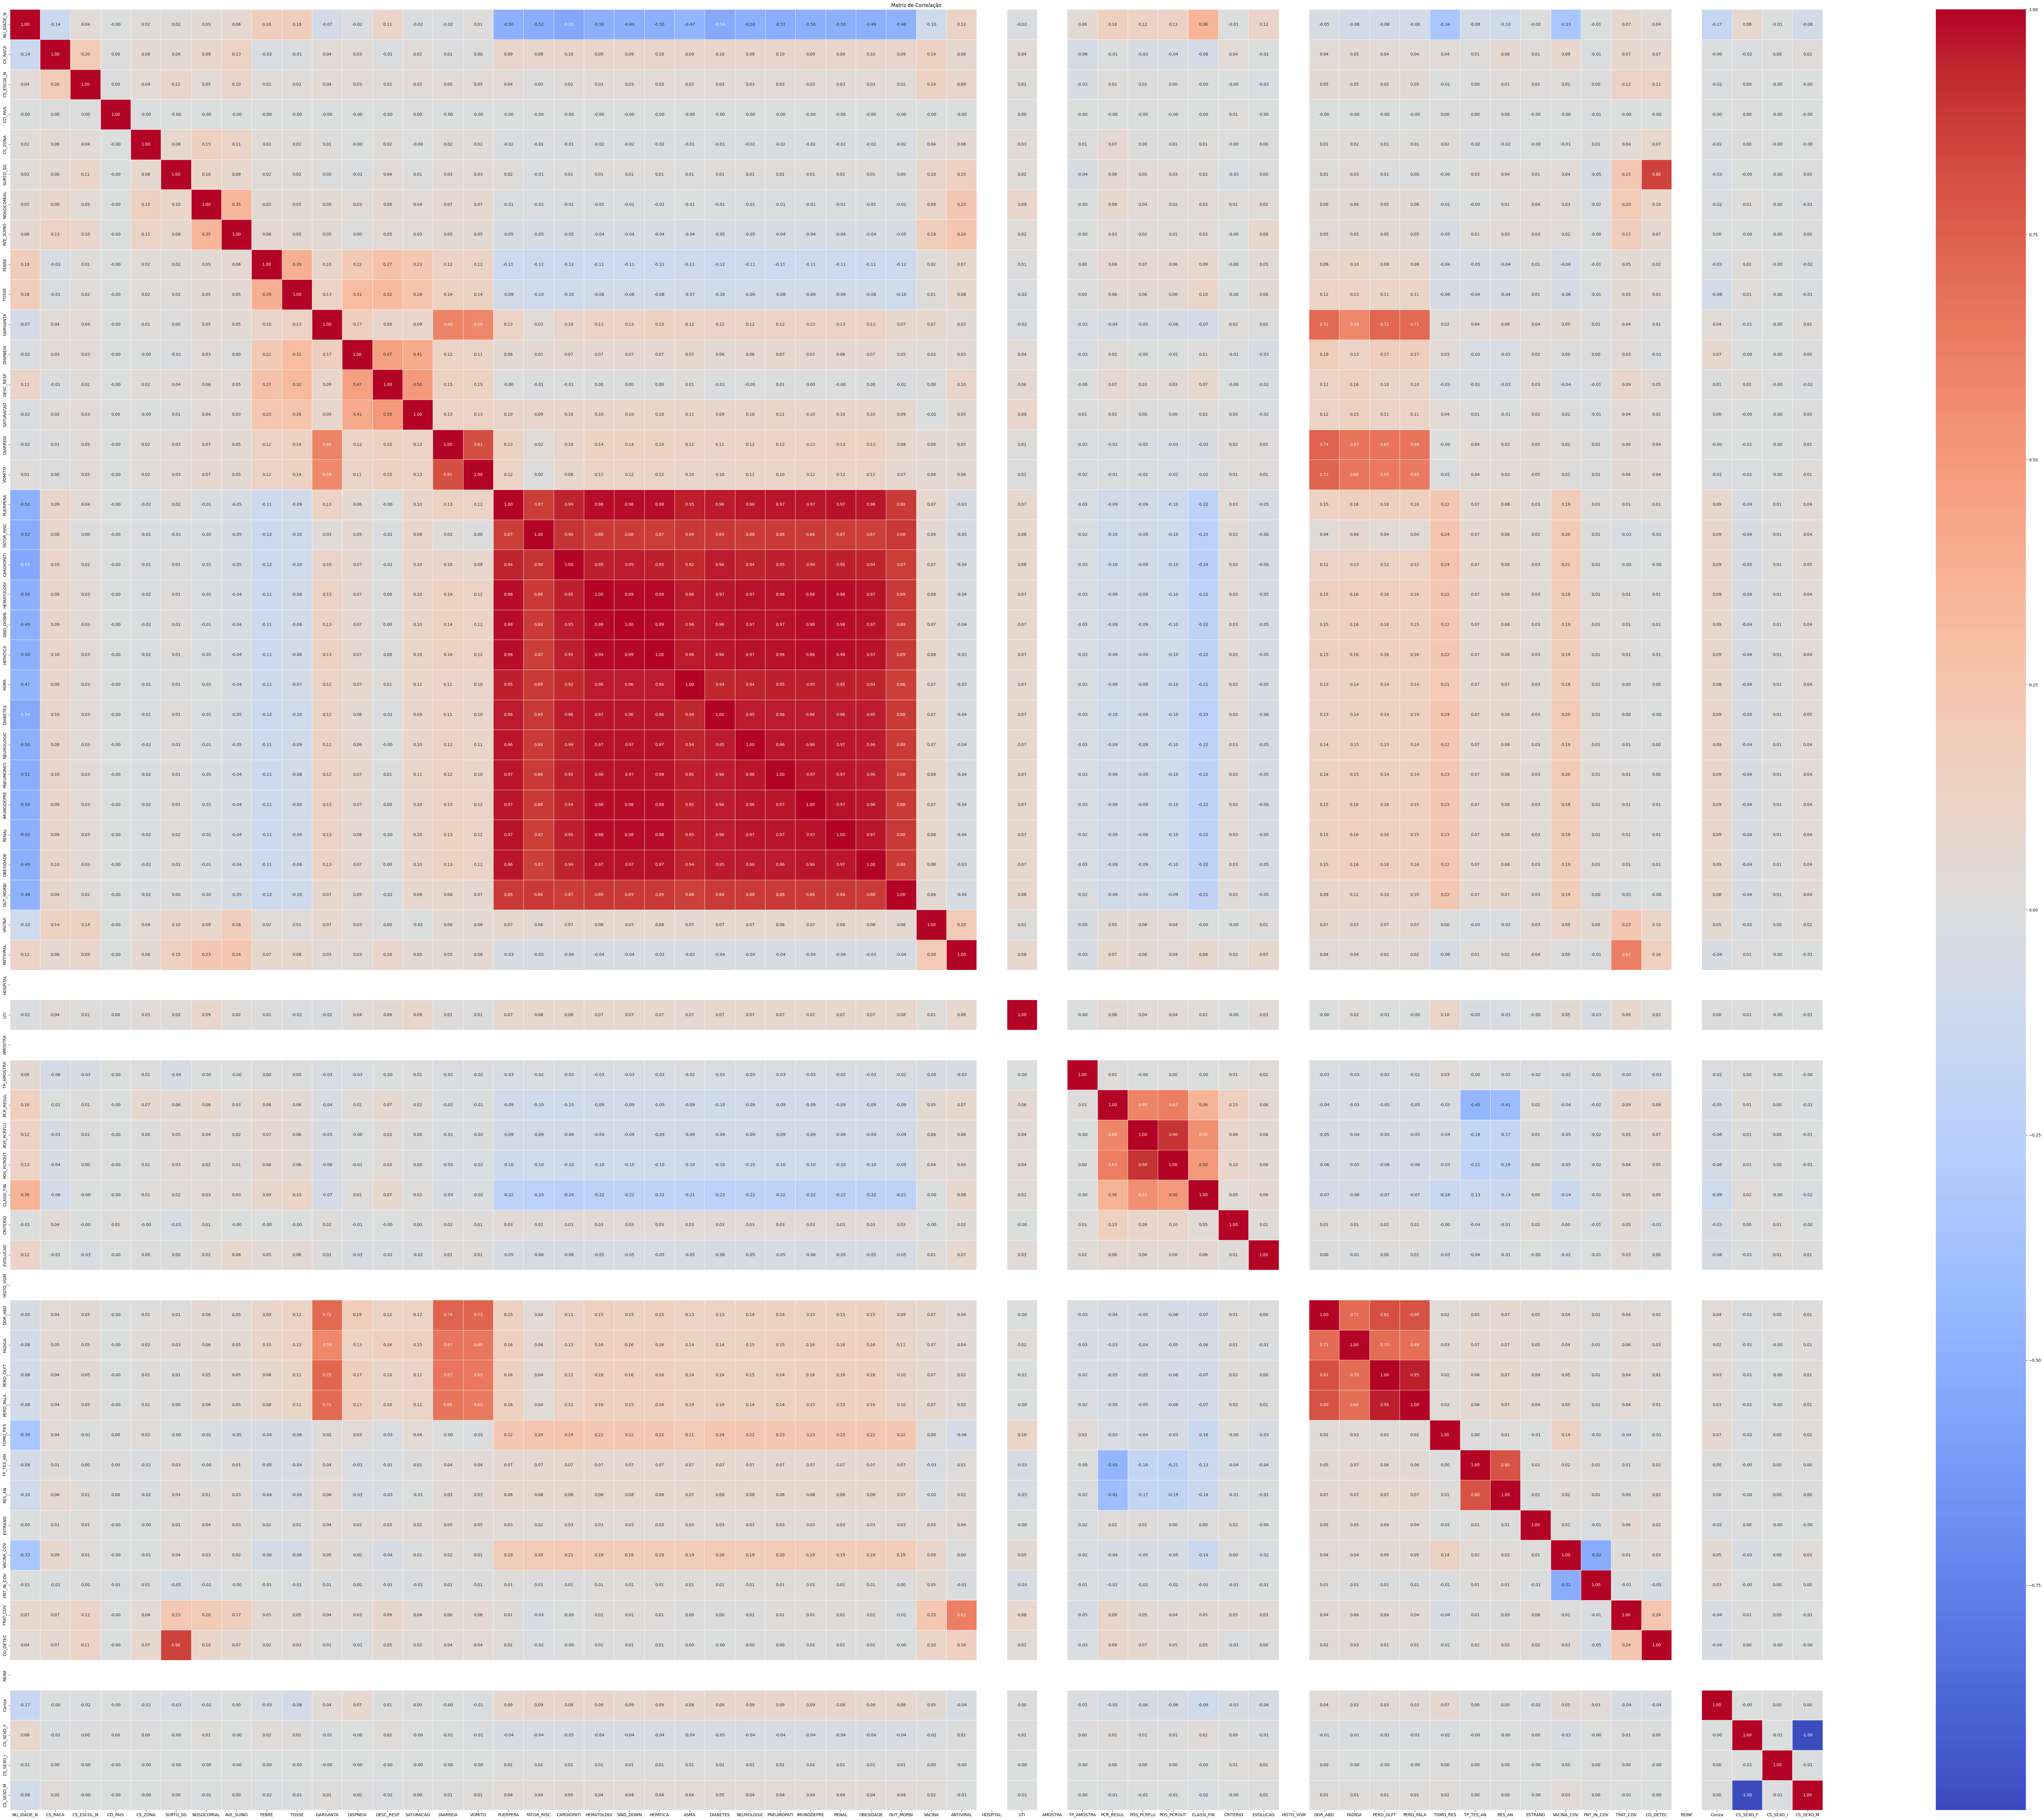

In [38]:
# Configurar o pandas para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Supondo que seu DataFrame seja var_dfFinal
# Calcular a matriz de correlação
correlation_matrix = var_dfFinal_encoded.corr()

# Exibir a matriz de correlação
print(correlation_matrix)

# Definir o tamanho da figura para aumentar a resolução
plt.figure(figsize=(100, 80))  # Ajuste o tamanho conforme necessário

# Visualizar a matriz de correlação usando um mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


In [39]:
var_dfFinal_encoded.corr()

NU_IDADE_N   CS_RACA  CS_ESCOL_N   CO_PAIS   CS_ZONA  SURTO_SG  \
NU_IDADE_N    1.000000 -0.135195    0.035569 -0.003063  0.022591  0.018283   
CS_RACA      -0.135195  1.000000    0.202825  0.001260  0.060048  0.056839   
CS_ESCOL_N    0.035569  0.202825    1.000000  0.001204  0.040850  0.109187   
CO_PAIS      -0.003063  0.001260    0.001204  1.000000 -0.000697 -0.002622   
CS_ZONA       0.022591  0.060048    0.040850 -0.000697  1.000000  0.077358   
SURTO_SG      0.018283  0.056839    0.109187 -0.002622  0.077358  1.000000   
NOSOCOMIAL    0.049777  0.088480    0.046386 -0.000600  0.148943  0.102896   
AVE_SUINO     0.064661  0.129399    0.096587 -0.001524  0.114234  0.078731   
FEBRE         0.178963 -0.025986    0.013378 -0.002104  0.018616  0.017816   
TOSSE         0.179440 -0.013576    0.021750 -0.001387  0.019026  0.021039   
GARGANTA     -0.069455  0.042078    0.043335 -0.000726  0.012979  0.002328   
DISPNEIA     -0.018402  0.032798    0.025345 -0.001639 -0.002551 -0.012185   
DESC_RESP     0.110744 -0.008341    0.021313 -0.001690  0.020803  0.040962   
SATURACAO    -0.021894  0.023299    0.028354  0.000319 -0.002649  0.007300   
DIARREIA     -0.016632  0.006235    0.046650 -0.000590  0.015944  0.033067   
VOMITO        0.012617  0.001454    0.046830 -0.000464  0.016396  0.032994   
PUERPERA     -0.495849  0.094204    0.035118 -0.000760 -0.016049  0.017661   
FATOR_RISC   -0.521400  0.084656    0.002931 -0.000230 -0.013674 -0.009509   
CARDIOPATI   -0.553589  0.100805    0.020187 -0.000407 -0.014117  0.006897   
HEMATOLOGI   -0.497911  0.093520    0.032756 -0.000729 -0.015631  0.014746   
SIND_DOWN    -0.494595  0.093171    0.032156 -0.000723 -0.015395  0.014490   
HEPATICA     -0.498527  0.095150    0.033807 -0.000743 -0.015510  0.014644   
ASMA         -0.465448  0.086123    0.029174 -0.000571 -0.014720  0.007115   
DIABETES     -0.535279  0.097032    0.025238 -0.000540 -0.014325  0.009271   
NEUROLOGIC   -0.500845  0.093514    0.029130 -0.001176 -0.015146  0.012593   
PNEUMOPATI   -0.510077  0.095799    0.030368 -0.000629 -0.015423  0.012686   
IMUNODEPRE   -0.500118  0.094464    0.033472 -0.000683 -0.016619  0.013859   
RENAL        -0.503062  0.093669    0.031779 -0.000709 -0.015351  0.015001   
OBESIDADE    -0.494634  0.096386    0.032956 -0.000747 -0.015428  0.014503   
OUT_MORBI    -0.481661  0.088019    0.019356 -0.000963 -0.016612  0.003333   
VACINA       -0.097596  0.139738    0.136614 -0.001018  0.044578  0.099456   
ANTIVIRAL     0.119905  0.064788    0.093284 -0.001385  0.058269  0.153768   
HOSPITAL           NaN       NaN         NaN       NaN       NaN       NaN   
UTI          -0.021307  0.037470    0.008232  0.000932  0.026311  0.017280   
AMOSTRA            NaN       NaN         NaN       NaN       NaN       NaN   
TP_AMOSTRA    0.058136 -0.059953   -0.031704 -0.000930  0.006074 -0.044603   
PCR_RESUL     0.162641 -0.006422    0.014779 -0.002257  0.068153  0.057519   
POS_PCRFLU    0.122014 -0.032572    0.007320 -0.001807  0.003915  0.045734   
POS_PCROUT    0.129285 -0.040328    0.000294 -0.001742  0.005744  0.026637   
CLASSI_FIN    0.357715 -0.064810   -0.004072 -0.003728  0.008229  0.020655   
CRITERIO     -0.006277  0.043466   -0.004752  0.013051 -0.001042 -0.030885   
EVOLUCAO      0.115886 -0.006218   -0.028175 -0.001015  0.001301  0.004293   
HISTO_VGM          NaN       NaN         NaN       NaN       NaN       NaN   
DOR_ABD      -0.053491  0.041240    0.048702 -0.000805  0.013721  0.012079   
FADIGA       -0.080688  0.048587    0.053150 -0.000379  0.017305  0.032508   
PERD_OLFT    -0.081717  0.042776    0.048681 -0.001062  0.011141  0.005633   
PERD_PALA    -0.078808  0.043820    0.049682 -0.001074  0.011587  0.003101   
TOMO_RES     -0.341851  0.042768   -0.006423  0.001404  0.022042 -0.000659   
TP_TES_AN    -0.077122  0.013819    0.003482  0.003792 -0.016792  0.029360   
RES_AN       -0.096007  0.063287    0.014745  0.003026 -0.016981  0.037189   
ESTRANG      -0.004736  0.009403  

# Modeling
Iniciando a modelagem do problema e separando em treino e teste

### Teste para as melhores colunas

In [40]:
var_dfFinal_encoded.head(5)

NU_IDADE_N  CS_RACA  CS_ESCOL_N  CO_PAIS  CS_ZONA  SURTO_SG  NOSOCOMIAL  \
0          81        1           1        1        2       2.0           2   
1           2        4           5        1        1       9.0           2   
2          71        1           3        1        1       2.0           2   
3          92        1           2        1        1       2.0           2   
9           2        4           5        1        1       2.0           2   

   AVE_SUINO  FEBRE  TOSSE  GARGANTA  DISPNEIA  DESC_RESP  SATURACAO  \
0          2      2      1         2         1          1          2   
1          2      1      1         2         1          1          1   
2          2      2      1         2         1          1          1   
3          2      2      2         1         2          2          2   
9          2      1      2         2         1          1          2   

   DIARREIA  VOMITO  PUERPERA  FATOR_RISC  CARDIOPATI  HEMATOLOGI  SIND_DOWN  \
0         2       2         2           1           2           2          2   
1         9       9         9           2           9           9          9   
2         2       2         2           1           2           2          2   
3         2       2         9           2           9           9          9   
9         2       2         9           2           9           9          9   

   HEPATICA  ASMA  DIABETES  NEUROLOGIC  PNEUMOPATI  IMUNODEPRE  RENAL  \
0         2     2         2           2           1           1      2   
1         9     9         9           9           9           9      9   
2         2     2         1           2           2           2      2   
3         9     9         9           9           9           9      9   
9         9     9         9           9           9           9      9   

   OBESIDADE  OUT_MORBI  VACINA  ANTIVIRAL  HOSPITAL  UTI  AMOSTRA  \
0          2          1       9          9         1    2        1   
1          9          9       9          2         1    2        1   
2          2          1       9          2         1    2        1   
3          9          9       2          2         1    2        1   
9          9          9       9          1         1    2        1   

   TP_AMOSTRA  PCR_RESUL  POS_PCRFLU  POS_PCROUT  CLASSI_FIN  CRITERIO  \
0           1          1         2.0           1           5         1   
1           1          1         2.0           1           2         1   
2           1          2         9.0           9           4         1   
3           1          4         9.0           9           5         1   
9           1          2         9.0           9           4         1   

   EVOLUCAO  HISTO_VGM  DOR_ABD  FADIGA  PERD_OLFT  PERD_PALA  TOMO_RES  \
0         3          0        1       2          2          2         9   
1         1          0        9       9          9          9         9   
2         1          0        2       2          2          2         2   
3         1          0        2       2          2          2         3   
9         1          0        2       2          2          2         9   

   TP_TES_AN  RES_AN  ESTRANG  VACINA_COV  FNT_IN_COV  TRAT_COV  CO_DETEC  \
0          9       9        9           1           2       9.0       2.0   
1          9       4        2           2           2       2.0       9.0   
2          9       5        2           1           2       9.0       2.0   
3          2       1        2           1           2       2.0       2.0   
9          2       2        2           2           2       2.0       9.0   

   REINF  Coriza  CS_SEXO_F  CS_SEXO_I  CS_SEXO_M  
0    2.0       0      False      False       True  
1    2.0       0      False      False       True  
2    2.0       0       True      False      False  
3    2.0       0       True      False      False  
9    2.0       0      False      False       True

### Todas as colunas

In [41]:
# Lista de colunas a serem usadas como features (X) para previsão, excluindo a coluna 'CLASSI_FIN'.
var_colunasX = [var_coluna for var_coluna in var_dfFinal_encoded.columns if var_coluna != 'CLASSI_FIN']

# Seleciona as colunas de features (X) e a coluna alvo (y) para previsão.
var_x = var_dfFinal_encoded[var_colunasX]  # Features (X).
var_y = var_dfFinal_encoded[['CLASSI_FIN']]  # Alvo (y).


Porcentagem de dados por cada tipo de classificação

In [42]:
var_dfFinal_encoded['CLASSI_FIN'].value_counts()/len(var_dfFinal_encoded)*100

CLASSI_FIN
4    57.085357
2    20.602652
5    16.456408
1     4.778845
3     1.076738
Name: count, dtype: Float64

In [43]:
# Divisão dos dados em conjuntos de treinamento e teste, mantendo a proporção das classes da variável alvo (stratify).
var_xTrain, var_xTest, var_yTrain, var_yTest = train_test_split(var_x, var_y, test_size=0.25, stratify=var_y, random_state=42)


In [44]:
print(var_xTrain.shape)
print(var_xTest.shape)
print(var_yTrain.shape)
print(var_yTest.shape)

(102671, 59)
(34224, 59)
(102671, 1)
(34224, 1)


## LogisticRegression

In [45]:
# Criação de um modelo de Regressão Logística.
var_lr = LogisticRegression()

# Treinamento do modelo de Regressão Logística com os dados de treinamento.
var_lr.fit(var_xTrain, var_yTrain)


c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
# Predição dos valores do conjunto de teste e do conjunto de treinamento usando o modelo de Regressão Logística.
var_yPredLrTest = var_lr.predict(var_xTest)  # Predição para o conjunto de teste.
var_yPredLrTrain = var_lr.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# Métricas de Avaliação

# Acurácia
print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredLrTest)*100}%')
print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredLrTrain)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(var_yTest, var_yPredLrTest, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredLrTrain, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(var_yTest, var_yPredLrTest, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredLrTrain, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(var_yTest, var_yPredLrTest, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(var_yTrain, var_yPredLrTrain, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(var_yTest, var_lr.predict_proba(var_xTest), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(var_yTrain, var_lr.predict_proba(var_xTrain), multi_class="ovr")*100}%')



Acurácia Teste: 87.53214118747078%
Acurácia Treino: 87.56903117725551%

f1_score Test: 86.60161988930966%
f1_score Treino: 86.63882859588084%

Precisão Teste: 86.28879167442214%
Precisão Treino: 86.3233574792488%

Recall Teste: 87.53214118747078%
Recall Treino: 87.56903117725551%

ROC Teste: 89.93770923061085%
ROC Treino: 90.51299069071165%


### Grid Search

In [47]:
# # Definir o grid de hiperparâmetros
# param_grid = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.01, 0.1, 1, 10],
#     'solver': ['liblinear', 'saga', 'lbfgs'],
#     'max_iter': [100, 200, 300],
#     'class_weight': [None, 'balanced'],
#     'tol': [1e-4, 1e-3]
# }

# grid_search = GridSearchCV(var_lr,param_grid, scoring= 'roc_auc', cv=5, n_jobs=-1)
# grid_search.fit(var_xTrain, var_yTrain)

# best_model = grid_search.best_estimator_

In [48]:
# # Predição dos valores do conjunto de teste e do conjunto de treinamento usando o modelo de Regressão Logística.
# var_yPredLrBoostTest = best_model.predict(var_xTest)  # Predição para o conjunto de teste.
# var_yPredLrBoostTrain =  best_model.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# # Métricas de Avaliação

# # Acurácia
# print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredLrBoostTest)*100}%')
# print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredLrBoostTrain)*100}%')
# print('============================================================= \n')

# # F1-score
# print(f'f1_score Test: {f1_score(var_yTest, var_yPredLrBoostTest, average="weighted")*100}%')
# print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredLrBoostTrain, average="weighted")*100}%')
# print('============================================================= \n')

# # Precisão
# print(f'Precisão Teste: {precision_score(var_yTest, var_yPredLrBoostTest, average="weighted")*100}%')
# print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredLrBoostTrain, average="weighted")*100}%')
# print('============================================================= \n')

# # Recall
# print(f'Recall Teste: {recall_score(var_yTest, var_yPredLrBoostTest, average="weighted")*100}%')
# print(f'Recall Treino: {recall_score(var_yTrain, var_yPredLrBoostTrain, average="weighted")*100}%')
# print('============================================================= \n')

# # Área sob a curva ROC
# print(f'ROC Teste: {roc_auc_score(var_yTest, best_model.predict_proba(var_xTest), multi_class="ovr")*100}%')
# print(f'ROC Treino: {roc_auc_score(var_yTrain, best_model.predict_proba(var_xTrain), multi_class="ovr")*100}%')

### Matriz de confusão e Curva Roc

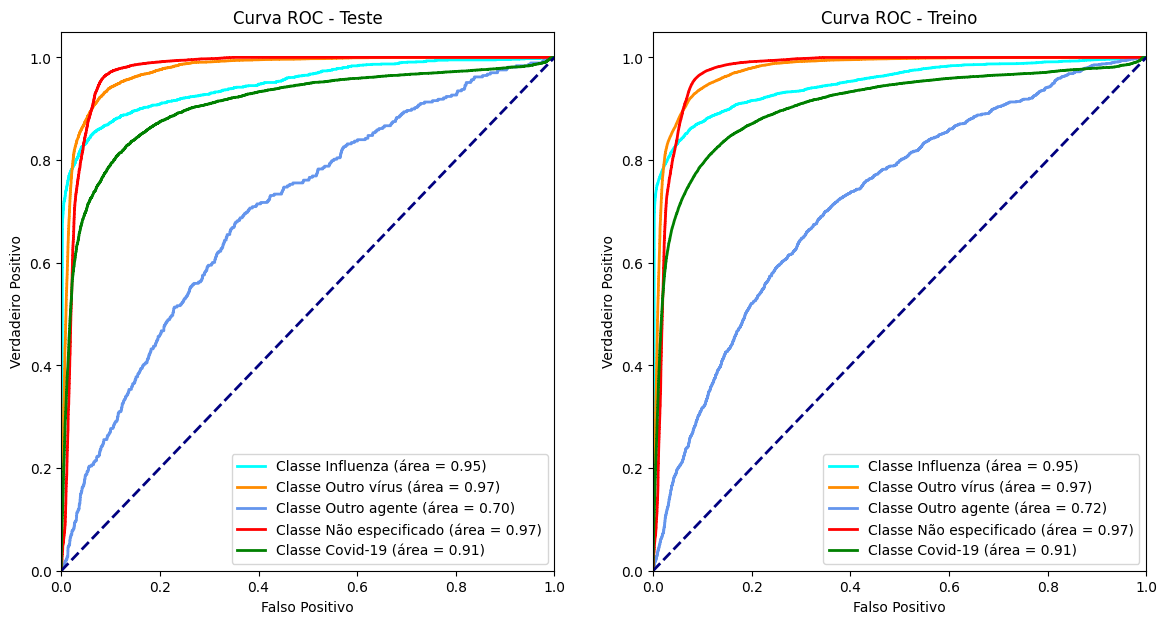

In [49]:
# Binarizando os rótulos
var_yTest_binarized = label_binarize(var_yTest, classes=var_lr.classes_)
var_yTrain_binarized = label_binarize(var_yTrain, classes=var_lr.classes_)
n_classes = var_yTest_binarized.shape[1]

# Plotando a Curva ROC para o conjunto de teste e treino
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(var_yTest_binarized[:, i], var_lr.predict_proba(var_xTest)[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])
    fpr_train[i], tpr_train[i], _ = roc_curve(var_yTrain_binarized[:, i], var_lr.predict_proba(var_xTrain)[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']

# Plotando todas as curvas ROC
plt.figure(figsize=(14, 7))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])

# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 1)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_test[i], tpr_test[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_test[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Teste')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de treino
plt.subplot(1, 2, 2)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_train[i], tpr_train[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_train[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Treino')
plt.legend(loc="lower right")

plt.show()

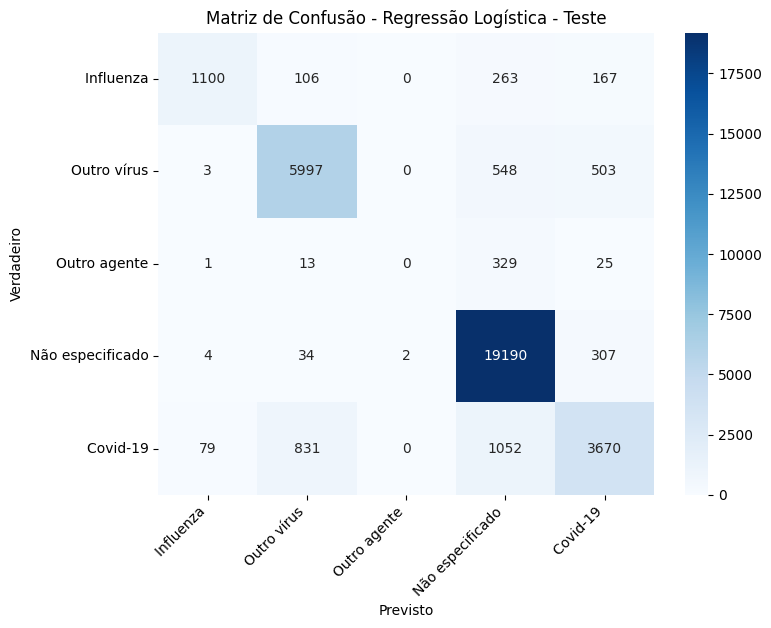

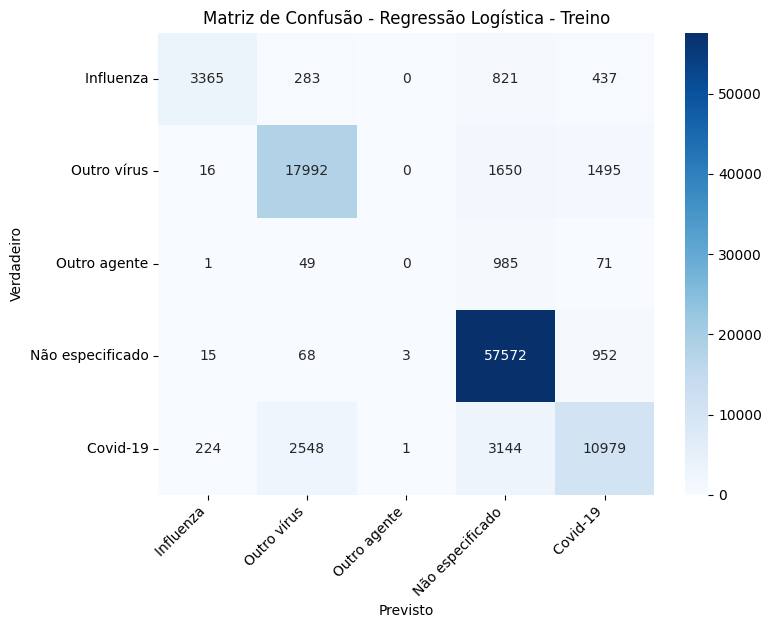

In [50]:

# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']


# Predições nos conjuntos de teste e treino usando o modelo de Regressão Logística.
var_yPredLrTest = var_lr.predict(var_xTest)
var_yPredLrTrain = var_lr.predict(var_xTrain)

# Matriz de Confusão para o conjunto de teste
conf_matrix_lr_test = confusion_matrix(var_yTest, var_yPredLrTest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Regressão Logística - Teste')
plt.show()

# Matriz de Confusão para o conjunto de treino
conf_matrix_lr_train = confusion_matrix(var_yTrain, var_yPredLrTrain)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Regressão Logística - Treino')
plt.show()


## KNN

In [51]:
# Criação de um modelo K-Vizinhos Mais Próximos com 5 vizinhos.
var_knn = KNeighborsClassifier(n_neighbors=7)

# Treinamento do modelo K-Vizinhos Mais Próximos com os dados de treinamento.
var_knn.fit(var_xTrain, var_yTrain)


c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [52]:
# Predição dos valores do conjunto de teste e do conjunto de treinamento usando o modelo K-Vizinhos Mais Próximos.
var_yPredKnnTest = var_knn.predict(var_xTest)  # Predição para o conjunto de teste.
var_yPredKnnTrain = var_knn.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# Métricas de Avaliação

# Acurácia
print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredKnnTest)*100}%')
print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredKnnTrain)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(var_yTest, var_yPredKnnTest, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredKnnTrain, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(var_yTest, var_yPredKnnTest, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredKnnTrain, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(var_yTest, var_yPredKnnTest, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(var_yTrain, var_yPredKnnTrain, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(var_yTest, var_knn.predict_proba(var_xTest), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(var_yTrain, var_knn.predict_proba(var_xTrain), multi_class="ovr")*100}%')


Acurácia Teste: 82.34280037400654%
Acurácia Treino: 85.38535711155049%

f1_score Test: 80.153611390345%
f1_score Treino: 83.72527454235352%

Precisão Teste: 80.2663279850329%
Precisão Treino: 84.33791254766028%

Recall Teste: 82.34280037400654%
Recall Treino: 85.38535711155049%

ROC Teste: 83.28383735071962%
ROC Treino: 97.15367714635181%


### Matriz de confusão e curva ROC

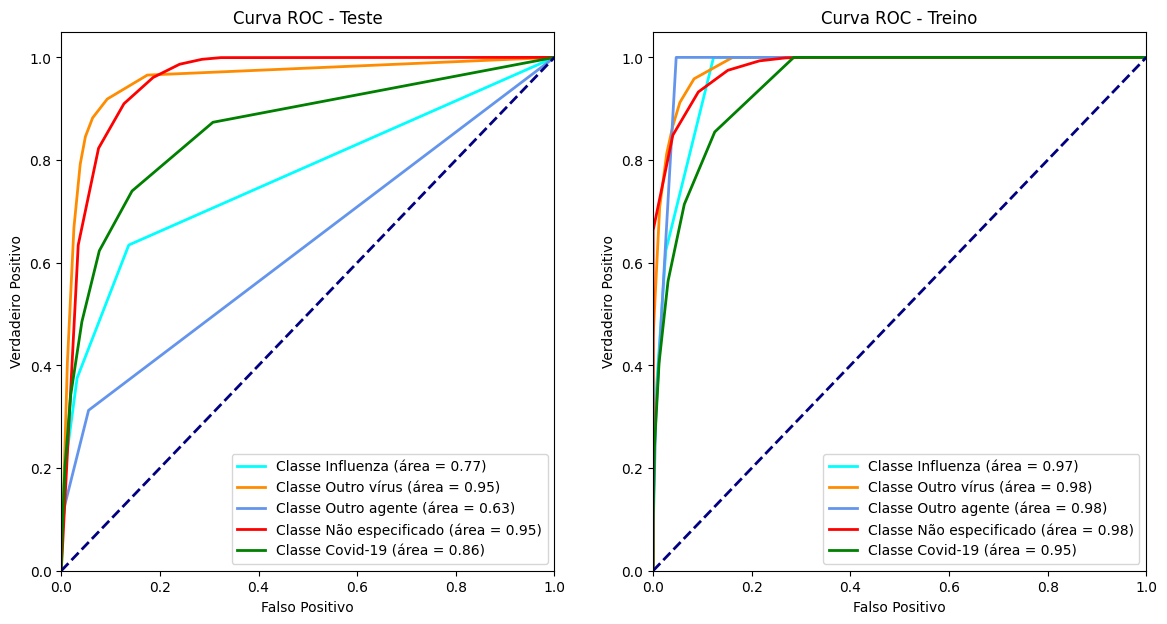

In [53]:
# Binarizando os rótulos
var_yTest_binarized = label_binarize(var_yTest, classes=var_knn.classes_)
var_yTrain_binarized = label_binarize(var_yTrain, classes=var_knn.classes_)
n_classes = var_yTest_binarized.shape[1]

# Plotando a Curva ROC para o conjunto de teste e treino
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(var_yTest_binarized[:, i], var_knn.predict_proba(var_xTest)[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])
    fpr_train[i], tpr_train[i], _ = roc_curve(var_yTrain_binarized[:, i], var_knn.predict_proba(var_xTrain)[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']

# Plotando todas as curvas ROC
plt.figure(figsize=(14, 7))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])


# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 1)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_test[i], tpr_test[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_test[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Teste')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de treino
plt.subplot(1, 2, 2)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_train[i], tpr_train[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_train[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Treino')
plt.legend(loc="lower right")

plt.show()

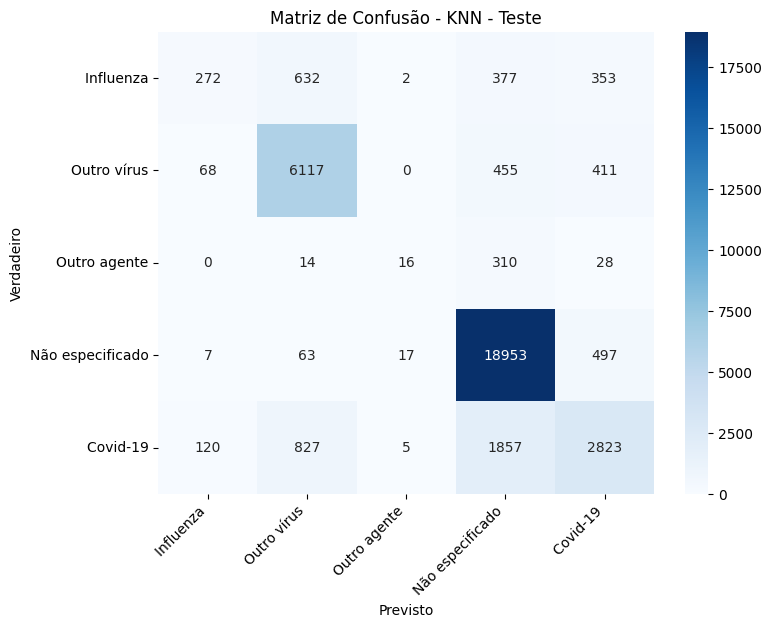

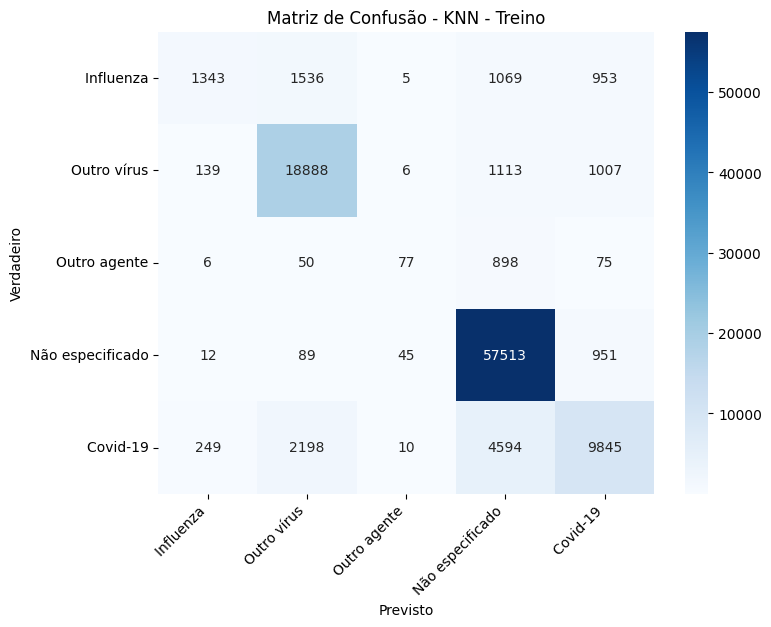

In [54]:
# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']


# Predições nos conjuntos de teste e treino usando o modelo K-Vizinhos Mais Próximos.
var_yPredKnnTest = var_knn.predict(var_xTest)
var_yPredKnnTrain = var_knn.predict(var_xTrain)

# Matriz de Confusão para o conjunto de teste
conf_matrix_knn_test = confusion_matrix(var_yTest, var_yPredKnnTest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - KNN - Teste')
plt.show()

# Matriz de Confusão para o conjunto de treino
conf_matrix_knn_train = confusion_matrix(var_yTrain, var_yPredKnnTrain)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn_train, annot=True, fmt='d', cmap='Blues',  xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - KNN - Treino')
plt.show()


##  Naive Bayes

In [55]:
# Criação do classificador Naive Bayes Gaussiano.
var_nb = GaussianNB()

# Treinamento do modelo Naive Bayes Gaussiano com os dados de treinamento.
var_nb.fit(var_xTrain, var_yTrain)


c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [56]:
# Predições nos conjuntos de teste e treino usando o modelo Naive Bayes
var_yPredNbTest = var_nb.predict(var_xTest)  # Predição para o conjunto de teste.
var_yPredNbTrain = var_nb.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# Métricas de Avaliação

# Acurácia
print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredNbTest)*100}%')
print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredNbTrain)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(var_yTest, var_yPredNbTest, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredNbTrain, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(var_yTest, var_yPredNbTest, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredNbTrain, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(var_yTest, var_yPredNbTest, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(var_yTrain, var_yPredNbTrain, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(var_yTest, var_nb.predict_proba(var_xTest), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(var_yTrain, var_nb.predict_proba(var_xTrain), multi_class="ovr")*100}%')


Acurácia Teste: 75.82398316970547%
Acurácia Treino: 75.72342725794041%

f1_score Test: 73.29960100902994%
f1_score Treino: 73.20037139120649%

Precisão Teste: 72.08294423008522%
Precisão Treino: 71.98179171009915%

Recall Teste: 75.82398316970547%
Recall Treino: 75.72342725794041%

ROC Teste: 80.79092856034438%
ROC Treino: 81.08899148728479%


### Matriz de cinfusão e curva ROC

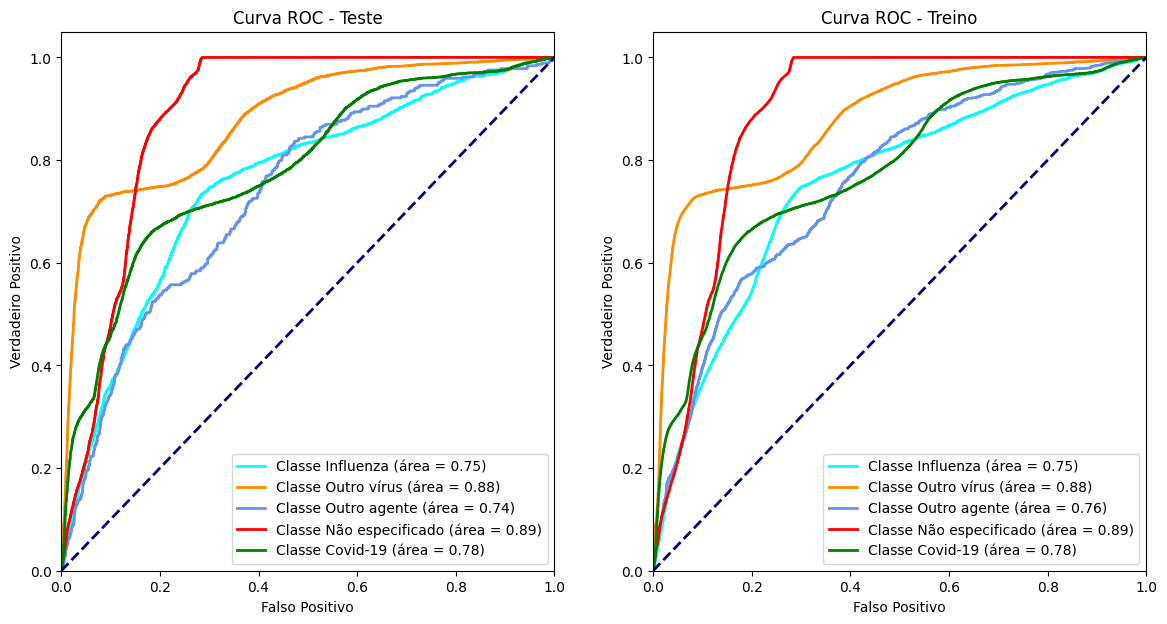

In [57]:
# Binarizando os rótulos
var_yTest_binarized = label_binarize(var_yTest, classes=var_nb.classes_)
var_yTrain_binarized = label_binarize(var_yTrain, classes=var_nb.classes_)
n_classes = var_yTest_binarized.shape[1]

# Plotando a Curva ROC para o conjunto de teste e treino
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(var_yTest_binarized[:, i], var_nb.predict_proba(var_xTest)[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])
    fpr_train[i], tpr_train[i], _ = roc_curve(var_yTrain_binarized[:, i], var_nb.predict_proba(var_xTrain)[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']

# Plotando todas as curvas ROC
plt.figure(figsize=(14, 7))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])


# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 1)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_test[i], tpr_test[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_test[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Teste')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de treino
plt.subplot(1, 2, 2)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_train[i], tpr_train[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_train[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Treino')
plt.legend(loc="lower right")

plt.show()

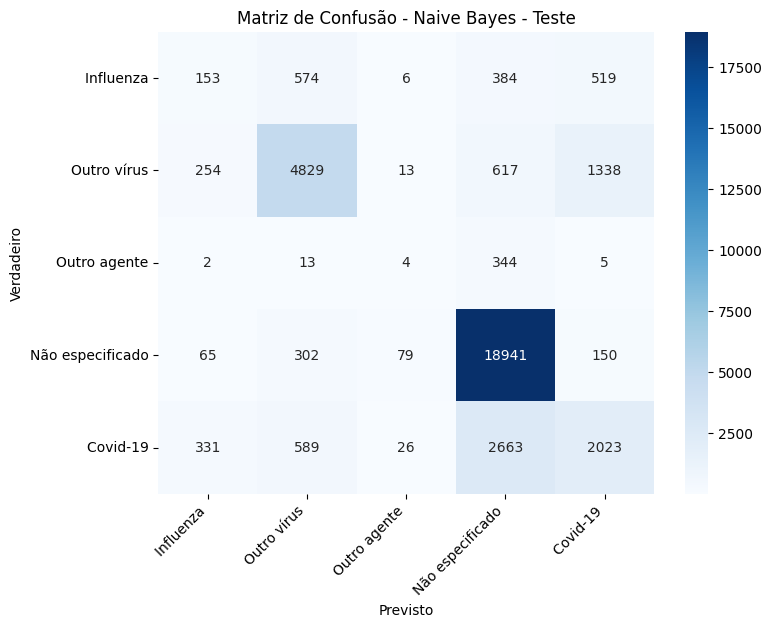

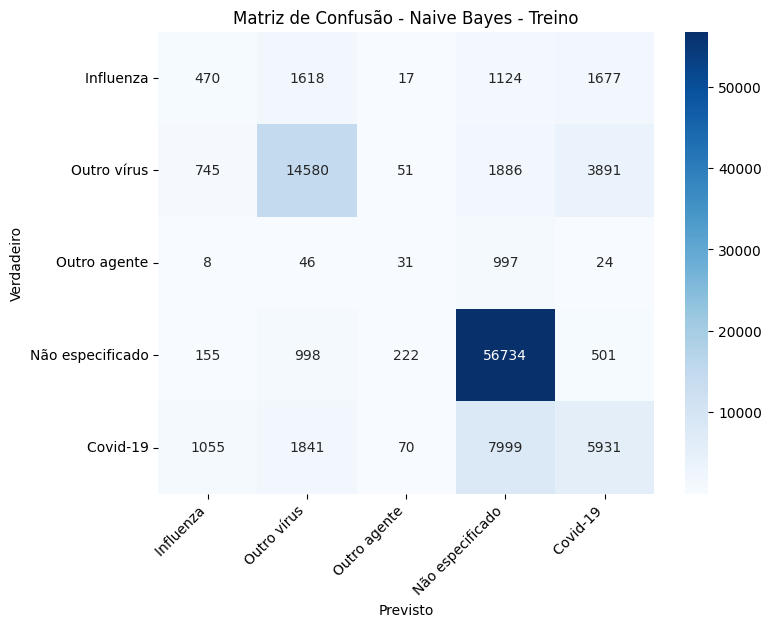

In [58]:
# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']

# Predições nos conjuntos de teste e treino usando o modelo Naive Bayes.
var_yPredNbTest = var_nb.predict(var_xTest)
var_yPredNbTrain = var_nb.predict(var_xTrain)

# Matriz de Confusão para o conjunto de teste
conf_matrix_nb_test = confusion_matrix(var_yTest, var_yPredNbTest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Naive Bayes - Teste')
plt.show()

# Matriz de Confusão para o conjunto de treino
conf_matrix_nb_train = confusion_matrix(var_yTrain, var_yPredNbTrain)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Naive Bayes - Treino')
plt.show()


# Metas TCC2

Aplicar novos modelos: SVM, Gradient Boosting, Árvores de Decisão e Florestas Aleatórias;​

Utilizar o Grid Search;​

Melhorar o pré-processamento dos dados da SRAG;

## SVM

In [59]:
# # Criação do classificador SVM.
# var_svc = SVC(C=1, random_state=1, kernel='linear')

# # Treinamento do modelo SVM com os dados de treinamento.
# var_svc.fit(var_xTrain, var_yTrain)


In [60]:
# # Predições nos conjuntos de teste e treino usando o modelo SVM
# var_yPredSVCTest = var_svc.predict(var_xTest)  # Predição para o conjunto de teste.
# var_yPredSVCTrain = var_svc.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# # Métricas de Avaliação

# # Acurácia
# print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredSVCTest)*100}%')
# print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredSVCTrain)*100}%')
# print('============================================================= \n')

# # F1-score
# print(f'f1_score Test: {f1_score(var_yTest, var_yPredSVCTest, average="weighted")*100}%')
# print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredSVCTrain, average="weighted")*100}%')
# print('============================================================= \n')

# # Precisão
# print(f'Precisão Teste: {precision_score(var_yTest, var_yPredSVCTest, average="weighted")*100}%')
# print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredSVCTrain, average="weighted")*100}%')
# print('============================================================= \n')

# # Recall
# print(f'Recall Teste: {recall_score(var_yTest, var_yPredSVCTest, average="weighted")*100}%')
# print(f'Recall Treino: {recall_score(var_yTrain, var_yPredSVCTrain, average="weighted")*100}%')
# print('============================================================= \n')

# # Área sob a curva ROC
# print(f'ROC Teste: {roc_auc_score(var_yTest, var_svc.predict_proba(var_xTest), multi_class="ovr")*100}%')
# print(f'ROC Treino: {roc_auc_score(var_yTrain, var_svc.predict_proba(var_xTrain), multi_class="ovr")*100}%')


## Gradient Boosting

In [61]:
# Criação do classificador Gradient Boosting.
var_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2024)

# Treinamento do modelo Gradient Boosting com os dados de treinamento.
var_gb.fit(var_xTrain, var_yTrain)

c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=2024)

In [62]:
# Predições nos conjuntos de teste e treino usando o modelo SVM
var_yPredGBTest = var_gb.predict(var_xTest)  # Predição para o conjunto de teste.
var_yPredGBTrain = var_gb.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# Métricas de Avaliação

# Acurácia
print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredGBTest)*100}%')
print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredGBTrain)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(var_yTest, var_yPredGBTest, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredGBTrain, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(var_yTest, var_yPredGBTest, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredGBTrain, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(var_yTest, var_yPredGBTest, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(var_yTrain, var_yPredGBTrain, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(var_yTest, var_gb.predict_proba(var_xTest), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(var_yTrain, var_gb.predict_proba(var_xTrain), multi_class="ovr")*100}%')


Acurácia Teste: 93.60682561944834%
Acurácia Treino: 93.80253430861684%

f1_score Test: 93.13568295282712%
f1_score Treino: 93.34465544237875%

Precisão Teste: 93.26198666891125%
Precisão Treino: 93.71817949196408%

Recall Teste: 93.60682561944834%
Recall Treino: 93.80253430861684%

ROC Teste: 96.22320163355995%
ROC Treino: 96.59314656732725%


### Grid Search

In [63]:
# # Hiperparâmetros para Gradient Boosting
# param_grid_gb = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'subsample': [0.6, 0.8, 1.0],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# grid_search = GridSearchCV(var_gb,param_grid_gb, scoring= 'roc_auc', cv=3, n_jobs=-1)
# grid_search.fit(var_xTrain, var_yTrain)

# best_model = grid_search.best_estimator_


In [64]:
# # Predição dos valores do conjunto de teste e do conjunto de treinamento usando o modelo de Regressão Logística.
# var_yPredGBBoostTest = best_model.predict(var_xTest)  # Predição para o conjunto de teste.
# var_yPredGBBoostTrain =  best_model.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# # Métricas de Avaliação

# # Acurácia
# print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredGBBoostTest)*100}%')
# print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredGBBoostTrain)*100}%')
# print('============================================================= \n')

# # F1-score
# print(f'f1_score Test: {f1_score(var_yTest, var_yPredGBBoostTest, average="weighted")*100}%')
# print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredGBBoostTrain, average="weighted")*100}%')
# print('============================================================= \n')

# # Precisão
# print(f'Precisão Teste: {precision_score(var_yTest, var_yPredGBBoostTest, average="weighted")*100}%')
# print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredGBBoostTrain, average="weighted")*100}%')
# print('============================================================= \n')

# # Recall
# print(f'Recall Teste: {recall_score(var_yTest, var_yPredGBBoostTest, average="weighted")*100}%')
# print(f'Recall Treino: {recall_score(var_yTrain, var_yPredGBBoostTrain, average="weighted")*100}%')
# print('============================================================= \n')

# # Área sob a curva ROC
# print(f'ROC Teste: {roc_auc_score(var_yTest, best_model.predict_proba(var_xTest), multi_class="ovr")*100}%')
# print(f'ROC Treino: {roc_auc_score(var_yTrain, best_model.predict_proba(var_xTrain), multi_class="ovr")*100}%')

### Matriz de confusão e Curva Roc

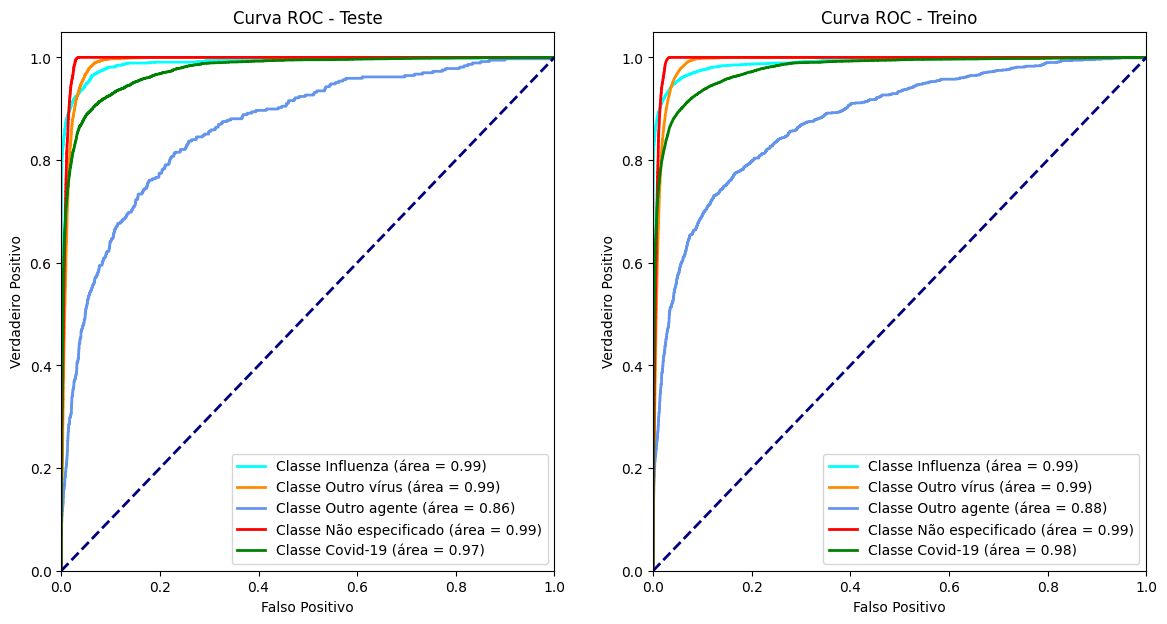

In [77]:
# Binarizando os rótulos
var_yTest_binarized = label_binarize(var_yTest, classes=var_gb.classes_)
var_yTrain_binarized = label_binarize(var_yTrain, classes=var_gb.classes_)
n_classes = var_yTest_binarized.shape[1]

# Plotando a Curva ROC para o conjunto de teste e treino
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(var_yTest_binarized[:, i], var_gb.predict_proba(var_xTest)[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])
    fpr_train[i], tpr_train[i], _ = roc_curve(var_yTrain_binarized[:, i], var_gb.predict_proba(var_xTrain)[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']

# Plotando todas as curvas ROC
plt.figure(figsize=(14, 7))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])


# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 1)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_test[i], tpr_test[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_test[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Teste')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de treino
plt.subplot(1, 2, 2)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_train[i], tpr_train[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_train[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Treino')
plt.legend(loc="lower right")

plt.show()

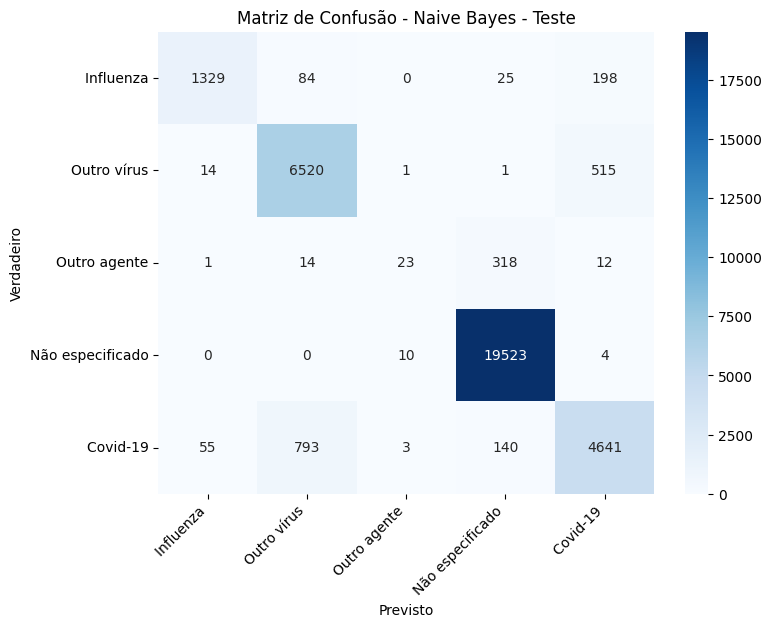

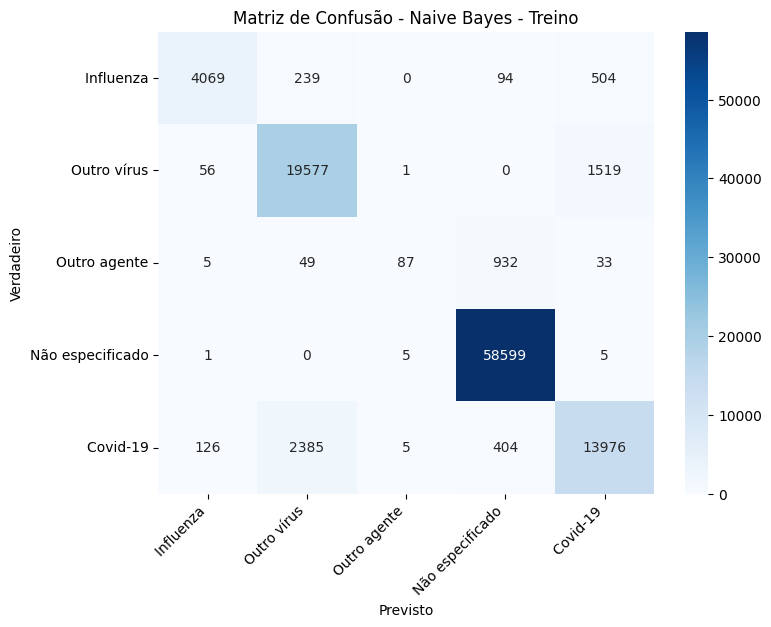

In [78]:
# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']

# Predições nos conjuntos de teste e treino usando o modelo Naive Bayes.
var_yPredvar_gbTest = var_gb.predict(var_xTest)
var_yPredvar_gbTrain = var_gb.predict(var_xTrain)

# Matriz de Confusão para o conjunto de teste
conf_matrix_var_gb_test = confusion_matrix(var_yTest, var_yPredvar_gbTest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_var_gb_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Naive Bayes - Teste')
plt.show()

# Matriz de Confusão para o conjunto de treino
conf_matrix_var_gb_train = confusion_matrix(var_yTrain, var_yPredvar_gbTrain)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_var_gb_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Naive Bayes - Treino')
plt.show()


## Árvores de Decisão

In [65]:
# Criação do classificador Árvore de decisão.
var_tree = DecisionTreeClassifier( max_depth=3, random_state=2024)

# Treinamento do modelo Árvore de decisão com os dados de treinamento.
var_tree.fit(var_xTrain, var_yTrain)

DecisionTreeClassifier(max_depth=3, random_state=2024)

In [66]:
# Predições nos conjuntos de teste e treino usando o modelo SVM
var_yPredTreeTest = var_tree.predict(var_xTest)  # Predição para o conjunto de teste.
var_yPredTreeTrain = var_tree.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# Métricas de Avaliação

# Acurácia
print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredTreeTest)*100}%')
print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredTreeTrain)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(var_yTest, var_yPredTreeTest, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredTreeTrain, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(var_yTest, var_yPredTreeTest, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredTreeTrain, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(var_yTest, var_yPredTreeTest, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(var_yTrain, var_yPredTreeTrain, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(var_yTest, var_tree.predict_proba(var_xTest), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(var_yTrain, var_tree.predict_proba(var_xTrain), multi_class="ovr")*100}%')


Acurácia Teste: 92.53155680224404%
Acurácia Treino: 92.64446630499363%

f1_score Test: 91.92400842709327%
f1_score Treino: 92.04118448069588%



c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precisão Teste: 91.59083334025402%
Precisão Treino: 91.71182212948804%

Recall Teste: 92.53155680224404%
Recall Treino: 92.64446630499363%

ROC Teste: 92.33441722597375%
ROC Treino: 92.25248592589162%


### Grid Search

In [67]:
# # Hiperparâmetros para Decision Tree
# param_grid_dt = {
#     'max_depth': [5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'criterion': ['gini', 'entropy']
# }

# grid_search = GridSearchCV(var_tree,param_grid_gb, scoring= 'roc_auc', cv=5, n_jobs=-1)
# grid_search.fit(var_xTrain, var_yTrain)

# best_model = grid_search.best_estimator_

In [68]:
# # Predição dos valores do conjunto de teste e do conjunto de treinamento usando o modelo de Regressão Logística.
# var_yPredTreeBoostTest = best_model.predict(var_xTest)  # Predição para o conjunto de teste.
# var_yPredTreeBoostTrain =  best_model.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# # Métricas de Avaliação

# # Acurácia
# print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredTreeBoostTest)*100}%')
# print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredTreeBoostTrain)*100}%')
# print('============================================================= \n')

# # F1-score
# print(f'f1_score Test: {f1_score(var_yTest, var_yPredTreeBoostTest, average="weighted")*100}%')
# print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredTreeBoostTrain, average="weighted")*100}%')
# print('============================================================= \n')

# # Precisão
# print(f'Precisão Teste: {precision_score(var_yTest, var_yPredTreeBoostTest, average="weighted")*100}%')
# print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredTreeBoostTrain, average="weighted")*100}%')
# print('============================================================= \n')

# # Recall
# print(f'Recall Teste: {recall_score(var_yTest, var_yPredLrBoostTest, average="weighted")*100}%')
# print(f'Recall Treino: {recall_score(var_yTrain, var_yPredTreeBoostTrain, average="weighted")*100}%')
# print('============================================================= \n')

# # Área sob a curva ROC
# print(f'ROC Teste: {roc_auc_score(var_yTest, best_model.predict_proba(var_xTest), multi_class="ovr")*100}%')
# print(f'ROC Treino: {roc_auc_score(var_yTrain, best_model.predict_proba(var_xTrain), multi_class="ovr")*100}%')

### matriz de confusão e Curva ROC

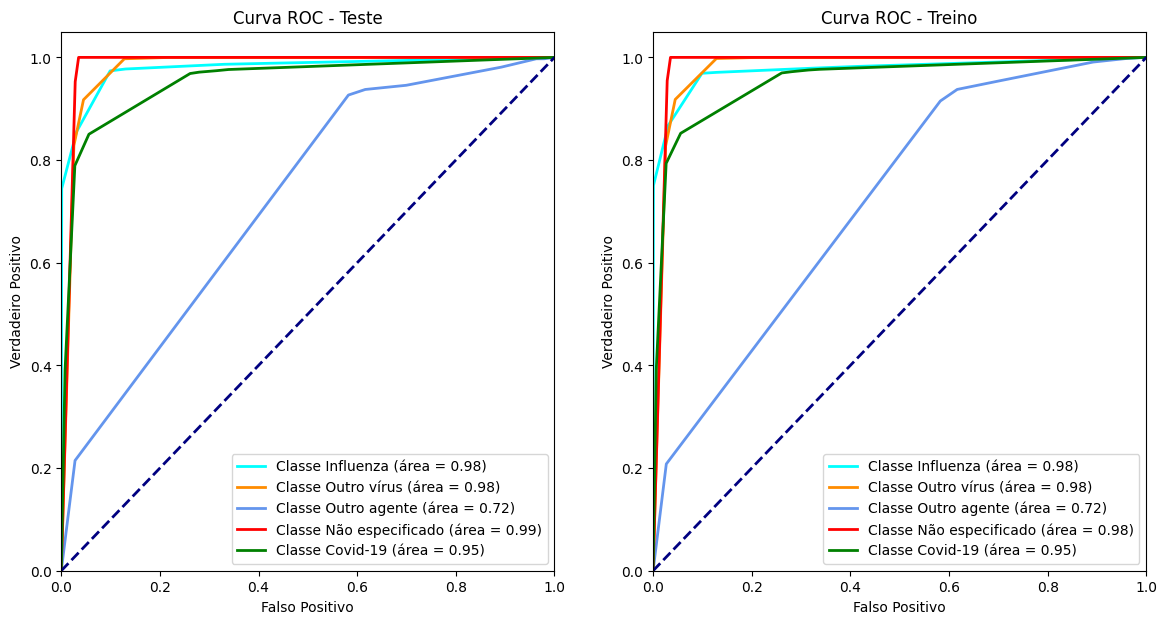

In [75]:
# Binarizando os rótulos
var_yTest_binarized = label_binarize(var_yTest, classes=var_tree.classes_)
var_yTrain_binarized = label_binarize(var_yTrain, classes=var_tree.classes_)
n_classes = var_yTest_binarized.shape[1]

# Plotando a Curva ROC para o conjunto de teste e treino
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(var_yTest_binarized[:, i], var_tree.predict_proba(var_xTest)[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])
    fpr_train[i], tpr_train[i], _ = roc_curve(var_yTrain_binarized[:, i], var_tree.predict_proba(var_xTrain)[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']

# Plotando todas as curvas ROC
plt.figure(figsize=(14, 7))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])


# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 1)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_test[i], tpr_test[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_test[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Teste')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de treino
plt.subplot(1, 2, 2)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_train[i], tpr_train[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_train[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Treino')
plt.legend(loc="lower right")

plt.show()

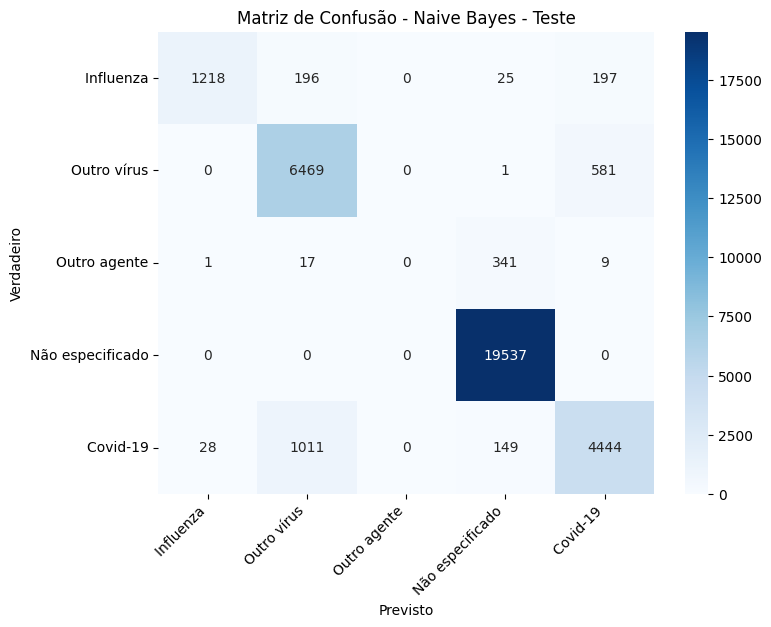

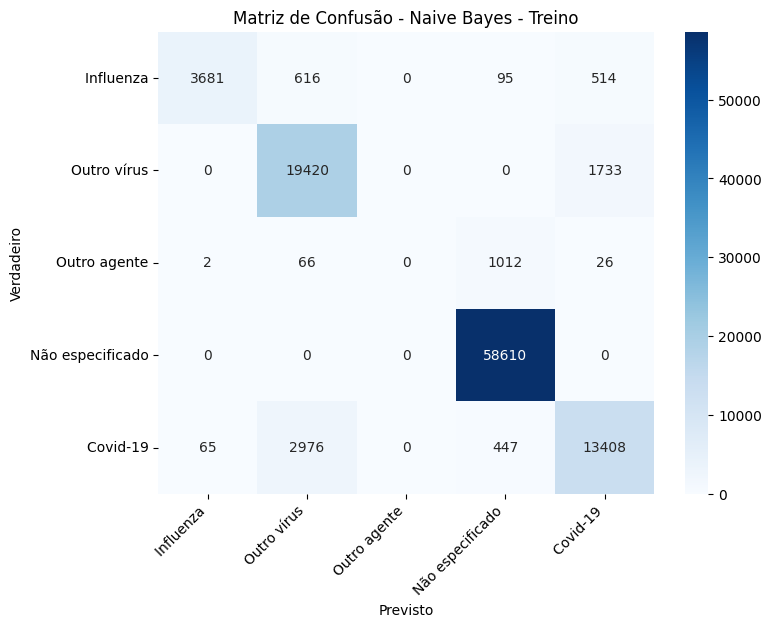

In [76]:
# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']

# Predições nos conjuntos de teste e treino usando o modelo Naive Bayes.
var_yPredvar_treeTest = var_tree.predict(var_xTest)
var_yPredvar_treeTrain = var_tree.predict(var_xTrain)

# Matriz de Confusão para o conjunto de teste
conf_matrix_var_tree_test = confusion_matrix(var_yTest, var_yPredvar_treeTest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_var_tree_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Naive Bayes - Teste')
plt.show()

# Matriz de Confusão para o conjunto de treino
conf_matrix_var_tree_train = confusion_matrix(var_yTrain, var_yPredvar_treeTrain)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_var_tree_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Naive Bayes - Treino')
plt.show()


## Random Forest

In [69]:
# Criação do Random forest.
var_rfc = RandomForestClassifier()

# Treinamento do modelo Random forest com os dados de treinamento.
var_rfc.fit(var_xTrain, var_yTrain)

c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [70]:
# Predições nos conjuntos de teste e treino usando o modelo Random forest
var_yPredRFCTest = var_rfc.predict(var_xTest)  # Predição para o conjunto de teste.
var_yPredRFCTrain = var_rfc.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# Métricas de Avaliação

# Acurácia
print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredRFCTest)*100}%')
print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredRFCTrain)*100}%')
print('============================================================= \n')

# F1-score
print(f'f1_score Test: {f1_score(var_yTest, var_yPredRFCTest, average="weighted")*100}%')
print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredRFCTrain, average="weighted")*100}%')
print('============================================================= \n')

# Precisão
print(f'Precisão Teste: {precision_score(var_yTest, var_yPredRFCTest, average="weighted")*100}%')
print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredRFCTrain, average="weighted")*100}%')
print('============================================================= \n')

# Recall
print(f'Recall Teste: {recall_score(var_yTest, var_yPredRFCTest, average="weighted")*100}%')
print(f'Recall Treino: {recall_score(var_yTrain, var_yPredRFCTrain, average="weighted")*100}%')
print('============================================================= \n')

# Área sob a curva ROC
print(f'ROC Teste: {roc_auc_score(var_yTest, var_rfc.predict_proba(var_xTest), multi_class="ovr")*100}%')
print(f'ROC Treino: {roc_auc_score(var_yTrain, var_rfc.predict_proba(var_xTrain), multi_class="ovr")*100}%')


Acurácia Teste: 93.72078073866292%
Acurácia Treino: 99.94350887787203%

f1_score Test: 93.26074192629926%
f1_score Treino: 99.9434726321801%

Precisão Teste: 93.38245819280667%
Precisão Treino: 99.94353779911671%

Recall Teste: 93.72078073866292%
Recall Treino: 99.94350887787203%

ROC Teste: 95.30603093599103%
ROC Treino: 99.99986069380684%


### Grid Search

In [71]:
# # Hiperparâmetros para Random Forest
# param_grid_rf = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False]
# }

# grid_search = GridSearchCV(var_rfc,param_grid_rf, scoring= 'roc_auc', cv=3, n_jobs=-1)
# grid_search.fit(var_xTrain, var_yTrain)

# best_model = grid_search.best_estimator_

In [72]:
# # Predição dos valores do conjunto de teste e do conjunto de treinamento usando o modelo de Regressão Logística.
# var_yPredRfBoostTest = best_model.predict(var_xTest)  # Predição para o conjunto de teste.
# var_yPredRFBoostTrain =  best_model.predict(var_xTrain)  # Predição para o conjunto de treinamento.

# # Métricas de Avaliação

# # Acurácia
# print(f'Acurácia Teste: {accuracy_score(var_yTest, var_yPredRfBoostTest)*100}%')
# print(f'Acurácia Treino: {accuracy_score(var_yTrain, var_yPredRFBoostTrain)*100}%')
# print('============================================================= \n')

# # F1-score
# print(f'f1_score Test: {f1_score(var_yTest, var_yPredRfBoostTest, average="weighted")*100}%')
# print(f'f1_score Treino: {f1_score(var_yTrain, var_yPredRFBoostTrain, average="weighted")*100}%')
# print('============================================================= \n')

# # Precisão
# print(f'Precisão Teste: {precision_score(var_yTest, var_yPredRfBoostTest, average="weighted")*100}%')
# print(f'Precisão Treino: {precision_score(var_yTrain, var_yPredRFBoostTrain, average="weighted")*100}%')
# print('============================================================= \n')

# # Recall
# print(f'Recall Teste: {recall_score(var_yTest, var_yPredRfBoostTest, average="weighted")*100}%')
# print(f'Recall Treino: {recall_score(var_yTrain, var_yPredRFBoostTrain, average="weighted")*100}%')
# print('============================================================= \n')

# # Área sob a curva ROC
# print(f'ROC Teste: {roc_auc_score(var_yTest, best_model.predict_proba(var_xTest), multi_class="ovr")*100}%')
# print(f'ROC Treino: {roc_auc_score(var_yTrain, best_model.predict_proba(var_xTrain), multi_class="ovr")*100}%')

### Matriz de confusão e Curva Roc

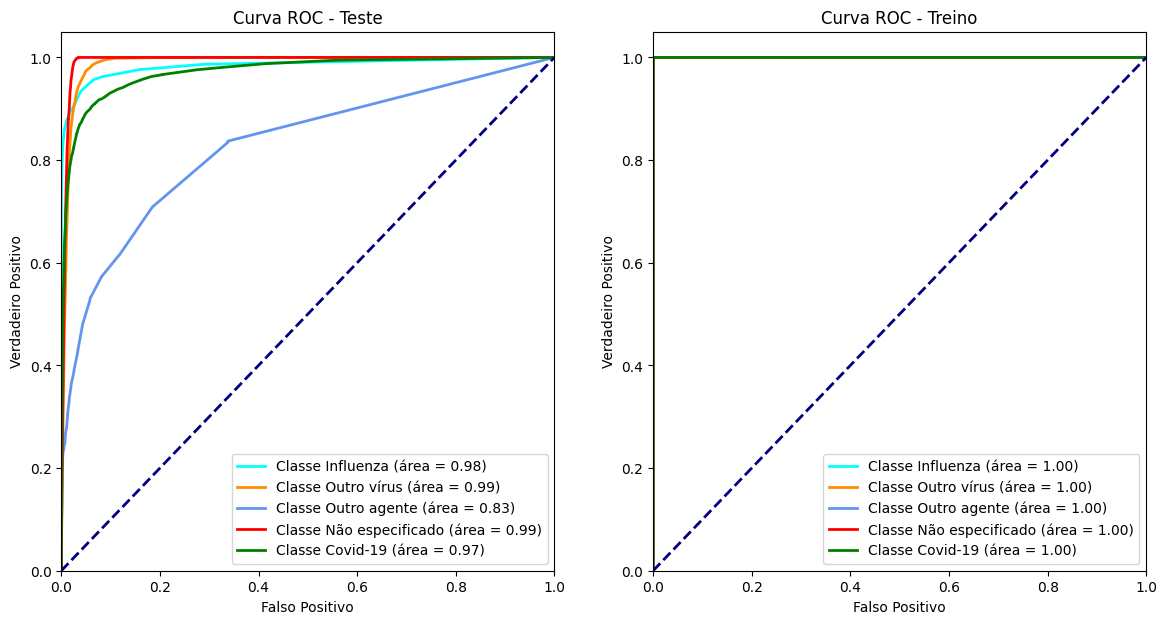

In [73]:
# Binarizando os rótulos
var_yTest_binarized = label_binarize(var_yTest, classes=var_rfc.classes_)
var_yTrain_binarized = label_binarize(var_yTrain, classes=var_rfc.classes_)
n_classes = var_yTest_binarized.shape[1]

# Plotando a Curva ROC para o conjunto de teste e treino
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(var_yTest_binarized[:, i], var_rfc.predict_proba(var_xTest)[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])
    fpr_train[i], tpr_train[i], _ = roc_curve(var_yTrain_binarized[:, i], var_rfc.predict_proba(var_xTrain)[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']

# Plotando todas as curvas ROC
plt.figure(figsize=(14, 7))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])


# Curva ROC para o conjunto de teste
plt.subplot(1, 2, 1)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_test[i], tpr_test[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_test[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Teste')
plt.legend(loc="lower right")

# Curva ROC para o conjunto de treino
plt.subplot(1, 2, 2)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_train[i], tpr_train[i], color=color, lw=2, label=f'Classe {class_names[i]} (área = {roc_auc_train[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC - Treino')
plt.legend(loc="lower right")

plt.show()

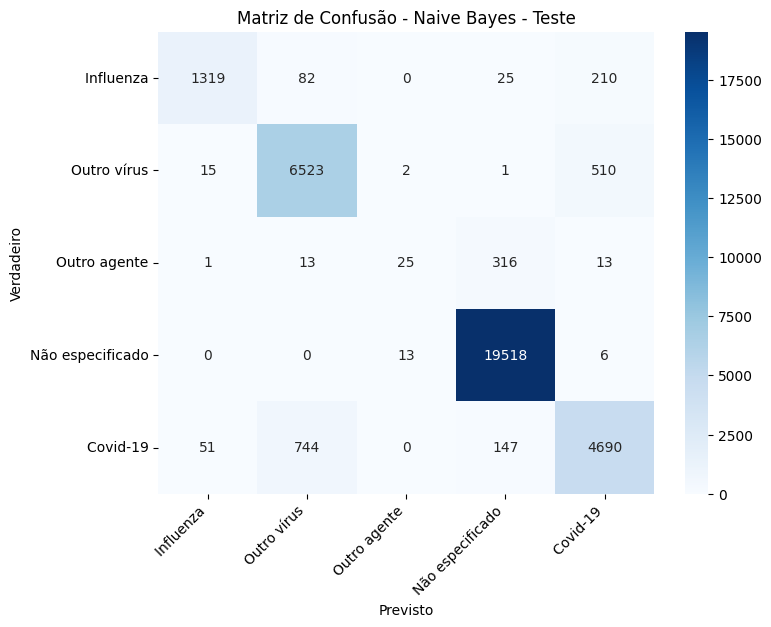

In [74]:
# Nomes das classes
class_names = ['Influenza​', 'Outro vírus', 'Outro agente', 'Não especificado​', 'Covid-19​']

# Predições nos conjuntos de teste e treino usando o modelo Naive Bayes.
var_yPredvar_rfcTest = var_rfc.predict(var_xTest)
var_yPredvar_rfcTrain = var_rfc.predict(var_xTrain)

# Matriz de Confusão para o conjunto de teste
conf_matrix_var_rfc_test = confusion_matrix(var_yTest, var_yPredvar_rfcTest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_var_rfc_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Naive Bayes - Teste')
plt.show()

# Matriz de Confusão para o conjunto de treino
conf_matrix_var_rfc_train = confusion_matrix(var_yTrain, var_yPredvar_rfcTrain)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_var_rfc_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Previsto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Naive Bayes - Treino')
plt.show()
